In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.HEATING_OIL)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,HO,-101062.0,60660.0,161722.0,10738.0,52627.0,41889.0,-6949.0,-1096.0,...,116650.0,-221825.0,-247835.0,104997.0,-22.00,10.81,-22.15,5.59,-22.31,4.55
808,2025-07-01,HO,-104727.0,71449.0,176176.0,12898.0,54458.0,41560.0,-3665.0,-6949.0,...,-221825.0,NaN,104997.0,NaN,10.81,NaN,5.59,NaN,4.55,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean     -88936.087763
std       27763.539642
min     -159660.000000
25%     -107553.000000
50%      -87631.000000
75%      -69721.000000
max      -13850.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count      809.000000
mean     11310.650185
std      20265.543668
min     -34954.000000
25%      -2699.000000
50%      12014.000000
75%      24770.000000
max      67696.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(231)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("ho_cot_mm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'ManagedMoney_NetPosition_change': ['F1_RolledPrice_rolling_20D_volatility',
  'prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_LongPosition_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'prior_report_ManagedMoney_ShortPosition_change',
  'prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_ShortPosition_change': ['F2_RolledPrice_rolling_20D_volatility',
  'F2_RolledPrice_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_5D_AGG_OI_change'],
 'ManagedMoney_NetPosition_to_openinterest_change': ['F1_RolledPrice_rolling_20D_volatility',
  'prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_to_openinterest_change': ['prior

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-21 10:28:57,112] A new study created in memory with name: no-name-decb2b59-2630-4374-b415-4078111472a7
Best trial: 1. Best value: 0.170114:   1%|       | 1/80 [00:01<01:46,  1.35s/it]

[I 2025-08-21 10:28:58,469] Trial 0 finished with value: 0.1700692800188775 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.1700692800188775.
[I 2025-08-21 10:28:58,513] Trial 1 finished with value: 0.17011433521257263 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.17011433521257263.


Best trial: 2. Best value: 0.399529:   4%|▎      | 3/80 [00:05<02:20,  1.82s/it]

[I 2025-08-21 10:29:02,437] Trial 2 finished with value: 0.3995291324218353 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3995291324218353.


Best trial: 2. Best value: 0.399529:  10%|▋      | 8/80 [00:05<00:32,  2.21it/s]

[I 2025-08-21 10:29:02,705] Trial 3 finished with value: 0.36128960441936614 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3995291324218353.
[I 2025-08-21 10:29:02,735] Trial 4 finished with value: 0.17011436585849984 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3995291324218353.
[I 2025-08-21 10:29:02,762] Trial 5 finished with value: 0.17011433518394894 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3995291324218353.
[I 2025-08-21 10:29:02,803] Trial 6 finished with value: 0.10819811924571675 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3995291324218353.
[I 2025-08-21 10:29:02,833] Trial 7 finished with value: 0.17011433518394894 and 

Best trial: 2. Best value: 0.399529:  12%|▊     | 10/80 [00:06<00:25,  2.70it/s]

[I 2025-08-21 10:29:03,145] Trial 8 finished with value: 0.38604400087556545 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.3995291324218353.
[I 2025-08-21 10:29:03,228] Trial 9 finished with value: 0.17011433518394894 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3995291324218353.


Best trial: 10. Best value: 0.399541:  12%|▋    | 10/80 [00:09<00:25,  2.70it/s]

[I 2025-08-21 10:29:06,895] Trial 10 finished with value: 0.39954097009861017 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.39954097009861017.


Best trial: 10. Best value: 0.399541:  15%|▊    | 12/80 [00:13<01:33,  1.37s/it]

[I 2025-08-21 10:29:10,347] Trial 11 finished with value: 0.3995409700986101 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.39954097009861017.


Best trial: 10. Best value: 0.399541:  16%|▊    | 13/80 [00:16<02:00,  1.80s/it]

[I 2025-08-21 10:29:14,034] Trial 12 finished with value: 0.39954097009861017 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.39954097009861017.


Best trial: 10. Best value: 0.399541:  18%|▉    | 14/80 [00:18<01:58,  1.79s/it]

[I 2025-08-21 10:29:15,812] Trial 13 finished with value: 0.3729229591463297 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.39954097009861017.


Best trial: 14. Best value: 0.401876:  19%|▉    | 15/80 [00:25<03:13,  2.97s/it]

[I 2025-08-21 10:29:22,760] Trial 14 finished with value: 0.40187567991935247 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40187567991935247.


Best trial: 14. Best value: 0.401876:  20%|█    | 16/80 [00:32<04:12,  3.94s/it]

[I 2025-08-21 10:29:29,663] Trial 15 finished with value: 0.40187567991935247 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40187567991935247.


Best trial: 14. Best value: 0.401876:  22%|█▏   | 18/80 [00:39<04:51,  4.69s/it]

[I 2025-08-21 10:29:36,492] Trial 16 finished with value: 0.40187567991935247 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40187567991935247.
[I 2025-08-21 10:29:36,536] Trial 17 finished with value: 0.16736502817510712 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.40187567991935247.
[I 2025-08-21 10:29:36,567] Trial 18 finished with value: 0.16971073572866632 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.40187567991935247.


Best trial: 14. Best value: 0.401876:  25%|█▎   | 20/80 [00:43<02:54,  2.90s/it]

[I 2025-08-21 10:29:40,394] Trial 19 finished with value: 0.38753623016531535 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.40187567991935247.


Best trial: 14. Best value: 0.401876:  26%|█▎   | 21/80 [00:48<03:23,  3.45s/it]

[I 2025-08-21 10:29:46,035] Trial 20 finished with value: 0.40179840010883533 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40187567991935247.


Best trial: 14. Best value: 0.401876:  28%|█▍   | 22/80 [00:55<04:03,  4.21s/it]

[I 2025-08-21 10:29:52,865] Trial 21 finished with value: 0.40187567991935247 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40187567991935247.


Best trial: 14. Best value: 0.401876:  29%|█▍   | 23/80 [01:01<04:24,  4.64s/it]

[I 2025-08-21 10:29:58,880] Trial 22 finished with value: 0.40179958278816436 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40187567991935247.


Best trial: 23. Best value: 0.402234:  30%|█▌   | 24/80 [01:03<03:32,  3.79s/it]

[I 2025-08-21 10:30:00,190] Trial 23 finished with value: 0.40223389082244876 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 23. Best value: 0.402234:  31%|█▌   | 25/80 [01:04<02:51,  3.12s/it]

[I 2025-08-21 10:30:01,504] Trial 24 finished with value: 0.4011230558123148 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 23. Best value: 0.402234:  32%|█▋   | 26/80 [01:05<02:22,  2.63s/it]

[I 2025-08-21 10:30:02,847] Trial 25 finished with value: 0.3953887369963311 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 23. Best value: 0.402234:  36%|█▊   | 29/80 [01:13<02:25,  2.85s/it]

[I 2025-08-21 10:30:10,168] Trial 26 finished with value: 0.36194603127960495 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.40223389082244876.
[I 2025-08-21 10:30:10,278] Trial 27 finished with value: 0.0880071979749319 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.40223389082244876.
[I 2025-08-21 10:30:10,314] Trial 28 finished with value: 0.1704942287032214 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.40223389082244876.
[I 2025-08-21 10:30:10,355] Trial 29 finished with value: 0.17011431171538777 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 23. Best value: 0.402234:  39%|█▉   | 31/80 [01:14<01:14,  1.52s/it]

[I 2025-08-21 10:30:11,583] Trial 30 finished with value: 0.3682789267742198 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 23. Best value: 0.402234:  40%|██   | 32/80 [01:21<02:06,  2.64s/it]

[I 2025-08-21 10:30:18,480] Trial 31 finished with value: 0.40187567991935247 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 23. Best value: 0.402234:  41%|██   | 33/80 [01:27<02:39,  3.40s/it]

[I 2025-08-21 10:30:24,444] Trial 32 finished with value: 0.40132610289040316 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 23. Best value: 0.402234:  42%|██▏  | 34/80 [01:34<03:18,  4.32s/it]

[I 2025-08-21 10:30:31,579] Trial 33 finished with value: 0.40123776586841114 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40223389082244876.


Best trial: 34. Best value: 0.408705:  44%|██▏  | 35/80 [01:35<02:39,  3.54s/it]

[I 2025-08-21 10:30:32,912] Trial 34 finished with value: 0.40870475766413433 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  45%|██▎  | 36/80 [01:37<02:16,  3.11s/it]

[I 2025-08-21 10:30:34,850] Trial 35 finished with value: 0.40511531137140727 and parameters: {'model': 'hgbm', 'learning_rate': 0.001178109274707556, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.018312198090511655, 'max_leaf_nodes': 250}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  46%|██▎  | 37/80 [01:39<01:52,  2.62s/it]

[I 2025-08-21 10:30:36,202] Trial 36 finished with value: 0.4065402945655664 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010140141545059533, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.02287437210526344, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  48%|██▍  | 38/80 [01:40<01:35,  2.26s/it]

[I 2025-08-21 10:30:37,579] Trial 37 finished with value: 0.40742062539010826 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011654291442980862, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.010822686254752231, 'max_leaf_nodes': 254}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  49%|██▍  | 39/80 [01:41<01:21,  1.99s/it]

[I 2025-08-21 10:30:38,916] Trial 38 finished with value: 0.40659649519529223 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010303667425493265, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.029702781213589744, 'max_leaf_nodes': 251}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  50%|██▌  | 40/80 [01:43<01:12,  1.80s/it]

[I 2025-08-21 10:30:40,249] Trial 39 finished with value: 0.4068093857818851 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010722448734123212, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0017175776367363976, 'max_leaf_nodes': 252}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  51%|██▌  | 41/80 [01:45<01:17,  1.98s/it]

[I 2025-08-21 10:30:42,649] Trial 40 finished with value: 0.4043039300713685 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013884363089158008, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.0020490287419676866, 'max_leaf_nodes': 250}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  52%|██▋  | 42/80 [01:46<01:08,  1.81s/it]

[I 2025-08-21 10:30:44,063] Trial 41 finished with value: 0.4065865625203672 and parameters: {'model': 'hgbm', 'learning_rate': 0.001026307129300536, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.004793321282179061, 'max_leaf_nodes': 251}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  54%|██▋  | 43/80 [01:48<01:01,  1.66s/it]

[I 2025-08-21 10:30:45,367] Trial 42 finished with value: 0.4066796681865634 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010486894863633348, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.004441971603125847, 'max_leaf_nodes': 252}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  55%|██▊  | 44/80 [01:49<01:00,  1.67s/it]

[I 2025-08-21 10:30:47,066] Trial 43 finished with value: 0.3984921857165167 and parameters: {'model': 'hgbm', 'learning_rate': 0.0038402228830266066, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.1725402992888868, 'max_leaf_nodes': 200}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  56%|██▊  | 45/80 [01:51<00:57,  1.63s/it]

[I 2025-08-21 10:30:48,606] Trial 44 finished with value: 0.40351983084865084 and parameters: {'model': 'hgbm', 'learning_rate': 0.003386104484362425, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.17852679402147376, 'max_leaf_nodes': 203}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  57%|██▉  | 46/80 [01:52<00:51,  1.53s/it]

[I 2025-08-21 10:30:49,894] Trial 45 finished with value: 0.40719302758789777 and parameters: {'model': 'hgbm', 'learning_rate': 0.002917566799077972, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.15565642637794957, 'max_leaf_nodes': 207}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  59%|██▉  | 47/80 [01:54<00:50,  1.53s/it]

[I 2025-08-21 10:30:51,434] Trial 46 finished with value: 0.39998046681466787 and parameters: {'model': 'hgbm', 'learning_rate': 0.003885058431177773, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.20985289704088925, 'max_leaf_nodes': 202}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  60%|███  | 48/80 [01:56<00:52,  1.63s/it]

[I 2025-08-21 10:30:53,298] Trial 47 finished with value: 0.39647105888431444 and parameters: {'model': 'hgbm', 'learning_rate': 0.002977513490525353, 'max_depth': 7, 'max_iter': 600, 'l2_regularization': 0.14507791777756096, 'max_leaf_nodes': 213}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  61%|███  | 49/80 [01:57<00:42,  1.38s/it]

[I 2025-08-21 10:30:54,090] Trial 48 finished with value: 0.4037678774331115 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025028003266116075, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.36392158085680615, 'max_leaf_nodes': 223}. Best is trial 34 with value: 0.40870475766413433.
[I 2025-08-21 10:30:54,122] Trial 49 finished with value: 0.17011433518394894 and parameters: {'model': 'ols'}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 34. Best value: 0.408705:  64%|███▏ | 51/80 [01:58<00:33,  1.15s/it]

[I 2025-08-21 10:30:55,843] Trial 50 finished with value: 0.3730650346327102 and parameters: {'model': 'hgbm', 'learning_rate': 0.010712749837317249, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.12192872948274291, 'max_leaf_nodes': 42}. Best is trial 34 with value: 0.40870475766413433.


Best trial: 51. Best value: 0.409219:  65%|███▎ | 52/80 [01:59<00:32,  1.15s/it]

[I 2025-08-21 10:30:57,001] Trial 51 finished with value: 0.4092189222145962 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016678332862350633, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.008559693627431485, 'max_leaf_nodes': 237}. Best is trial 51 with value: 0.4092189222145962.


Best trial: 52. Best value: 0.410743:  66%|███▎ | 53/80 [02:01<00:31,  1.15s/it]

[I 2025-08-21 10:30:58,159] Trial 52 finished with value: 0.4107432728504314 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020349205492488226, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.09108730232267331, 'max_leaf_nodes': 228}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  68%|███▍ | 54/80 [02:02<00:32,  1.24s/it]

[I 2025-08-21 10:30:59,648] Trial 53 finished with value: 0.4069046957765136 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019034096913243394, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.11692584873871349, 'max_leaf_nodes': 225}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:30:59,680] Trial 54 finished with value: 0.17032958623562083 and parameters: {'model': 'ridge', 'alpha': 222.49952313298738}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  70%|███▌ | 56/80 [02:04<00:24,  1.04s/it]

[I 2025-08-21 10:31:01,191] Trial 55 finished with value: 0.407608773271987 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021899992086418948, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.13087789462601346, 'max_leaf_nodes': 225}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  71%|███▌ | 57/80 [02:05<00:27,  1.21s/it]

[I 2025-08-21 10:31:02,949] Trial 56 finished with value: 0.38340778852212043 and parameters: {'model': 'hgbm', 'learning_rate': 0.006722686592203198, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.28853585998673015, 'max_leaf_nodes': 177}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  76%|███▊ | 61/80 [02:08<00:15,  1.22it/s]

[I 2025-08-21 10:31:05,959] Trial 57 finished with value: 0.3944441850835044 and parameters: {'model': 'hgbm', 'learning_rate': 0.002179137882890357, 'max_depth': 10, 'max_iter': 900, 'l2_regularization': 0.9222422348986458, 'max_leaf_nodes': 225}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:31:05,993] Trial 58 finished with value: 0.170114335144662 and parameters: {'model': 'lasso', 'alpha': 1.2395590952849827e-06}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:31:06,025] Trial 59 finished with value: 0.17011433518394894 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:31:06,070] Trial 60 finished with value: 0.16736502896988248 and parameters: {'model': 'enet', 'alpha': 8.225792172879086e-06, 'l1_ratio': 0.981854063146382, 'loss': 'squared_error'}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  78%|███▉ | 62/80 [02:10<00:17,  1.05it/s]

[I 2025-08-21 10:31:07,587] Trial 61 finished with value: 0.4075296195509167 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020610681176632998, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.11564070130216851, 'max_leaf_nodes': 225}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  79%|███▉ | 63/80 [02:12<00:19,  1.17s/it]

[I 2025-08-21 10:31:09,513] Trial 62 finished with value: 0.4073615794729742 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021626704602513117, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.11464309041154344, 'max_leaf_nodes': 227}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  80%|████ | 64/80 [02:14<00:22,  1.40s/it]

[I 2025-08-21 10:31:11,653] Trial 63 finished with value: 0.4037225301622173 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019119667055857198, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.10010265970613019, 'max_leaf_nodes': 228}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  81%|████ | 65/80 [02:15<00:19,  1.31s/it]

[I 2025-08-21 10:31:12,708] Trial 64 finished with value: 0.40027086647425225 and parameters: {'model': 'hgbm', 'learning_rate': 0.005753798185974472, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.09325631480993367, 'max_leaf_nodes': 175}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  82%|████▏| 66/80 [02:17<00:20,  1.44s/it]

[I 2025-08-21 10:31:14,496] Trial 65 finished with value: 0.4076858467889459 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018620819014108355, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.2382831542409282, 'max_leaf_nodes': 227}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  84%|████▏| 67/80 [02:20<00:23,  1.81s/it]

[I 2025-08-21 10:31:17,282] Trial 66 finished with value: 0.38052542165110786 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:31:17,314] Trial 67 finished with value: 0.1701143384394382 and parameters: {'model': 'ridge', 'alpha': 0.005087701929680542}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  86%|████▎| 69/80 [02:22<00:17,  1.58s/it]

[I 2025-08-21 10:31:19,830] Trial 68 finished with value: 0.4006275463955147 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016578056562039007, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.2470341256643696, 'max_leaf_nodes': 232}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  88%|████▍| 70/80 [02:23<00:14,  1.45s/it]

[I 2025-08-21 10:31:20,901] Trial 69 finished with value: 0.4091788411620134 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018055797497788125, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.523703233265056, 'max_leaf_nodes': 178}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:31:20,934] Trial 70 finished with value: 0.17010588577357696 and parameters: {'model': 'lasso', 'alpha': 0.2307679419112213}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  90%|████▌| 72/80 [02:24<00:08,  1.10s/it]

[I 2025-08-21 10:31:22,076] Trial 71 finished with value: 0.4093024416933395 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018368683734903356, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.513637185322811, 'max_leaf_nodes': 178}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  91%|████▌| 73/80 [02:26<00:08,  1.17s/it]

[I 2025-08-21 10:31:23,471] Trial 72 finished with value: 0.4062416893507859 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018129706464020338, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.5125495702161168, 'max_leaf_nodes': 177}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  92%|████▋| 74/80 [02:27<00:06,  1.14s/it]

[I 2025-08-21 10:31:24,539] Trial 73 finished with value: 0.40946095772780344 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018791983054263417, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.5616787381338312, 'max_leaf_nodes': 149}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  94%|████▋| 75/80 [02:28<00:05,  1.12s/it]

[I 2025-08-21 10:31:25,591] Trial 74 finished with value: 0.36285597044446855 and parameters: {'model': 'hgbm', 'learning_rate': 0.027243339737032052, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.5513042662499519, 'max_leaf_nodes': 142}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:31:25,644] Trial 75 finished with value: 0.09272576405686629 and parameters: {'model': 'enet', 'alpha': 0.0005542861384391507, 'l1_ratio': 0.5717066274798221, 'loss': 'huber', 'epsilon': 0.1543764104994202}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  96%|████▊| 77/80 [02:29<00:02,  1.11it/s]

[I 2025-08-21 10:31:26,812] Trial 76 finished with value: 0.2911932687801981 and parameters: {'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 156}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743:  98%|████▉| 78/80 [02:30<00:01,  1.07it/s]

[I 2025-08-21 10:31:27,852] Trial 77 finished with value: 0.4075028751245863 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015987501935059599, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.42345743217391835, 'max_leaf_nodes': 133}. Best is trial 52 with value: 0.4107432728504314.


Best trial: 52. Best value: 0.410743: 100%|█████| 80/80 [02:32<00:00,  1.90s/it]
[I 2025-08-21 10:31:29,258] A new study created in memory with name: no-name-8433a901-1a38-499b-9a00-f0f67de0abad


[I 2025-08-21 10:31:29,207] Trial 78 finished with value: 0.38672631989678175 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.4107432728504314.
[I 2025-08-21 10:31:29,251] Trial 79 finished with value: 0.17011433518394894 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.4107432728504314.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0020349205492488226, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.09108730232267331, 'max_leaf_nodes': 228}

Best Per Model:
lasso: score=0.1697, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.1701, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.3619, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2912, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 900, '

Best trial: 0. Best value: 0.20035:   1%|        | 1/80 [00:00<00:06, 12.86it/s]

[I 2025-08-21 10:31:29,303] Trial 0 finished with value: 0.2003504509260374 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.2003504509260374.
[I 2025-08-21 10:31:29,336] Trial 1 finished with value: 0.2002769097441754 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.2003504509260374.


Best trial: 2. Best value: 0.316968:   4%|▎      | 3/80 [00:03<01:39,  1.29s/it]

[I 2025-08-21 10:31:33,136] Trial 2 finished with value: 0.3169682017631316 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3169682017631316.


Best trial: 2. Best value: 0.316968:   9%|▌      | 7/80 [00:04<00:31,  2.35it/s]

[I 2025-08-21 10:31:33,398] Trial 3 finished with value: 0.26831344947466457 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3169682017631316.
[I 2025-08-21 10:31:33,430] Trial 4 finished with value: 0.20029944916491477 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3169682017631316.
[I 2025-08-21 10:31:33,472] Trial 5 finished with value: 0.20027688849503433 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3169682017631316.
[I 2025-08-21 10:31:33,515] Trial 6 finished with value: 0.01879035262523867 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3169682017631316.
[I 2025-08-21 10:31:33,557] Trial 7 finished with value: 0.20027688849503433 and 

Best trial: 2. Best value: 0.316968:  11%|▊      | 9/80 [00:04<00:23,  2.99it/s]

[I 2025-08-21 10:31:33,851] Trial 8 finished with value: 0.3017449948199377 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.3169682017631316.
[I 2025-08-21 10:31:33,882] Trial 9 finished with value: 0.20027688849503433 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3169682017631316.


Best trial: 2. Best value: 0.316968:  14%|▊     | 11/80 [00:08<00:59,  1.17it/s]

[I 2025-08-21 10:31:37,615] Trial 10 finished with value: 0.3169414107182059 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3169682017631316.


Best trial: 2. Best value: 0.316968:  15%|▉     | 12/80 [00:12<01:36,  1.42s/it]

[I 2025-08-21 10:31:41,378] Trial 11 finished with value: 0.3169414107182059 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3169682017631316.


Best trial: 2. Best value: 0.316968:  16%|▉     | 13/80 [00:15<02:08,  1.92s/it]

[I 2025-08-21 10:31:45,106] Trial 12 finished with value: 0.3169414107182059 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3169682017631316.


Best trial: 2. Best value: 0.316968:  18%|█     | 14/80 [00:17<02:04,  1.89s/it]

[I 2025-08-21 10:31:46,878] Trial 13 finished with value: 0.30453485483283704 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.3169682017631316.


Best trial: 14. Best value: 0.32037:  19%|█▏    | 15/80 [00:24<03:31,  3.26s/it]

[I 2025-08-21 10:31:54,203] Trial 14 finished with value: 0.3203700053890321 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3203700053890321.


Best trial: 14. Best value: 0.32037:  20%|█▏    | 16/80 [00:32<04:35,  4.31s/it]

[I 2025-08-21 10:32:01,423] Trial 15 finished with value: 0.32034712476209654 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3203700053890321.


Best trial: 14. Best value: 0.32037:  22%|█▎    | 18/80 [00:39<05:24,  5.23s/it]

[I 2025-08-21 10:32:09,081] Trial 16 finished with value: 0.32033214309758307 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3203700053890321.
[I 2025-08-21 10:32:09,127] Trial 17 finished with value: 0.20016839650962534 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.3203700053890321.
[I 2025-08-21 10:32:09,172] Trial 18 finished with value: 0.1995479371211766 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.3203700053890321.


Best trial: 14. Best value: 0.32037:  25%|█▌    | 20/80 [00:43<03:04,  3.08s/it]

[I 2025-08-21 10:32:12,828] Trial 19 finished with value: 0.3117486073228267 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3203700053890321.


Best trial: 20. Best value: 0.328315:  26%|█▎   | 21/80 [00:48<03:26,  3.50s/it]

[I 2025-08-21 10:32:17,955] Trial 20 finished with value: 0.3283145426388418 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  28%|█▍   | 22/80 [00:54<03:47,  3.92s/it]

[I 2025-08-21 10:32:23,318] Trial 21 finished with value: 0.32647215639187865 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  29%|█▍   | 23/80 [00:59<04:02,  4.25s/it]

[I 2025-08-21 10:32:28,594] Trial 22 finished with value: 0.3283145426388418 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  30%|█▌   | 24/80 [01:04<04:12,  4.51s/it]

[I 2025-08-21 10:32:33,831] Trial 23 finished with value: 0.3283145426388418 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  31%|█▌   | 25/80 [01:09<04:17,  4.68s/it]

[I 2025-08-21 10:32:38,997] Trial 24 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  32%|█▋   | 26/80 [01:15<04:32,  5.04s/it]

[I 2025-08-21 10:32:44,954] Trial 25 finished with value: 0.3163058702693314 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  38%|█▉   | 30/80 [01:17<01:31,  1.83s/it]

[I 2025-08-21 10:32:46,385] Trial 26 finished with value: 0.3153893496084474 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:32:46,452] Trial 27 finished with value: 0.07704200768925712 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:32:46,483] Trial 28 finished with value: 0.17365129845821345 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:32:46,529] Trial 29 finished with value: 0.20027694055524892 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  39%|█▉   | 31/80 [01:19<01:33,  1.92s/it]

[I 2025-08-21 10:32:48,754] Trial 30 finished with value: 0.30207283969800147 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  40%|██   | 32/80 [01:24<02:08,  2.68s/it]

[I 2025-08-21 10:32:53,997] Trial 31 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  41%|██   | 33/80 [01:29<02:27,  3.14s/it]

[I 2025-08-21 10:32:58,567] Trial 32 finished with value: 0.3243994023474677 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  42%|██▏  | 34/80 [01:34<02:47,  3.64s/it]

[I 2025-08-21 10:33:03,629] Trial 33 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  44%|██▏  | 35/80 [01:36<02:25,  3.24s/it]

[I 2025-08-21 10:33:05,804] Trial 34 finished with value: 0.3124571974951832 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  48%|██▍  | 38/80 [01:41<01:26,  2.05s/it]

[I 2025-08-21 10:33:10,481] Trial 35 finished with value: 0.3221816113989802 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:33:10,516] Trial 36 finished with value: 0.16842881385205863 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:33:10,583] Trial 37 finished with value: 0.20027688858498183 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  49%|██▍  | 39/80 [01:47<02:03,  3.01s/it]

[I 2025-08-21 10:33:16,643] Trial 38 finished with value: 0.3185046089665851 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  50%|██▌  | 40/80 [01:49<01:50,  2.77s/it]

[I 2025-08-21 10:33:18,684] Trial 39 finished with value: 0.30928971319742454 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:33:18,715] Trial 40 finished with value: 0.20027688849503433 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  52%|██▋  | 42/80 [01:54<01:41,  2.66s/it]

[I 2025-08-21 10:33:23,727] Trial 41 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  54%|██▋  | 43/80 [01:59<01:58,  3.20s/it]

[I 2025-08-21 10:33:28,707] Trial 42 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  55%|██▊  | 44/80 [02:04<02:07,  3.55s/it]

[I 2025-08-21 10:33:33,322] Trial 43 finished with value: 0.32067210845309524 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  56%|██▊  | 45/80 [02:10<02:26,  4.19s/it]

[I 2025-08-21 10:33:39,326] Trial 44 finished with value: 0.32013810748707555 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  59%|██▉  | 47/80 [02:15<02:26,  4.45s/it]

[I 2025-08-21 10:33:44,459] Trial 45 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:33:44,502] Trial 46 finished with value: 0.20094068343341842 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:33:44,533] Trial 47 finished with value: 0.20027688849503433 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  61%|███  | 49/80 [02:20<01:31,  2.94s/it]

[I 2025-08-21 10:33:49,387] Trial 48 finished with value: 0.31986336741006666 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:33:49,432] Trial 49 finished with value: 0.2001683547841776 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  64%|███▏ | 51/80 [02:26<01:29,  3.09s/it]

[I 2025-08-21 10:33:56,186] Trial 50 finished with value: 0.32293942502377937 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  65%|███▎ | 52/80 [02:32<01:38,  3.52s/it]

[I 2025-08-21 10:34:01,458] Trial 51 finished with value: 0.325543367170966 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  66%|███▎ | 53/80 [02:37<01:43,  3.82s/it]

[I 2025-08-21 10:34:06,369] Trial 52 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  68%|███▍ | 54/80 [02:43<01:54,  4.39s/it]

[I 2025-08-21 10:34:12,575] Trial 53 finished with value: 0.3233688852522535 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  69%|███▍ | 55/80 [02:44<01:30,  3.63s/it]

[I 2025-08-21 10:34:13,980] Trial 54 finished with value: 0.31943151714795454 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  70%|███▌ | 56/80 [02:49<01:33,  3.91s/it]

[I 2025-08-21 10:34:18,663] Trial 55 finished with value: 0.3243994023474678 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  71%|███▌ | 57/80 [02:51<01:21,  3.53s/it]

[I 2025-08-21 10:34:21,190] Trial 56 finished with value: 0.2620953586182639 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  72%|███▋ | 58/80 [02:52<01:00,  2.73s/it]

[I 2025-08-21 10:34:21,876] Trial 57 finished with value: 0.3168990996215755 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  74%|███▋ | 59/80 [02:55<00:55,  2.66s/it]

[I 2025-08-21 10:34:24,362] Trial 58 finished with value: 0.3173392355092018 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:34:24,418] Trial 59 finished with value: 0.20027698315921197 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  76%|███▊ | 61/80 [03:02<00:57,  3.01s/it]

[I 2025-08-21 10:34:31,259] Trial 60 finished with value: 0.3236186187836369 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  78%|███▉ | 62/80 [03:07<01:03,  3.50s/it]

[I 2025-08-21 10:34:36,277] Trial 61 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  79%|███▉ | 63/80 [03:12<01:06,  3.94s/it]

[I 2025-08-21 10:34:41,469] Trial 62 finished with value: 0.325543367170966 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 20. Best value: 0.328315:  80%|████ | 64/80 [03:18<01:11,  4.45s/it]

[I 2025-08-21 10:34:47,317] Trial 63 finished with value: 0.3208758228575273 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.3283145426388418.
[I 2025-08-21 10:34:47,367] Trial 64 finished with value: 0.09178144218066508 and parameters: {'model': 'enet', 'alpha': 6.0135889303135485e-06, 'l1_ratio': 0.5320050672678175, 'loss': 'huber', 'epsilon': 0.15022797170428165}. Best is trial 20 with value: 0.3283145426388418.


Best trial: 65. Best value: 0.328315:  82%|████▏| 66/80 [03:23<00:50,  3.62s/it]

[I 2025-08-21 10:34:52,376] Trial 65 finished with value: 0.32831454263884197 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  84%|████▏| 67/80 [03:30<00:57,  4.41s/it]

[I 2025-08-21 10:34:59,353] Trial 66 finished with value: 0.3203642005362378 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.
[I 2025-08-21 10:34:59,393] Trial 67 finished with value: 0.20027688849503433 and parameters: {'model': 'ols'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  86%|████▎| 69/80 [03:32<00:33,  3.06s/it]

[I 2025-08-21 10:35:01,477] Trial 68 finished with value: 0.2916051597648765 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 65 with value: 0.32831454263884197.
[I 2025-08-21 10:35:01,511] Trial 69 finished with value: 0.20031719710587212 and parameters: {'model': 'ridge', 'alpha': 0.08626228112528067}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  89%|████▍| 71/80 [03:37<00:26,  2.91s/it]

[I 2025-08-21 10:35:06,794] Trial 70 finished with value: 0.32647215639187865 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  90%|████▌| 72/80 [03:42<00:26,  3.35s/it]

[I 2025-08-21 10:35:11,797] Trial 71 finished with value: 0.32780447966127735 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  91%|████▌| 73/80 [03:47<00:26,  3.81s/it]

[I 2025-08-21 10:35:17,174] Trial 72 finished with value: 0.3264721563918787 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  92%|████▋| 74/80 [03:54<00:26,  4.50s/it]

[I 2025-08-21 10:35:23,777] Trial 73 finished with value: 0.32460942615051885 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  94%|████▋| 75/80 [04:01<00:25,  5.04s/it]

[I 2025-08-21 10:35:30,380] Trial 74 finished with value: 0.3053144468998792 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  95%|████▊| 76/80 [04:06<00:20,  5.03s/it]

[I 2025-08-21 10:35:35,374] Trial 75 finished with value: 0.3283145426388418 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  96%|████▊| 77/80 [04:06<00:11,  3.83s/it]

[I 2025-08-21 10:35:36,104] Trial 76 finished with value: 0.1839537794748426 and parameters: {'model': 'hgbm', 'learning_rate': 0.2918396596927686, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.009283177793250053, 'max_leaf_nodes': 183}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315:  98%|████▉| 78/80 [04:13<00:09,  4.61s/it]

[I 2025-08-21 10:35:42,664] Trial 77 finished with value: 0.3236186187836369 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 65 with value: 0.32831454263884197.
[I 2025-08-21 10:35:42,714] Trial 78 finished with value: 0.20027691156374441 and parameters: {'model': 'lasso', 'alpha': 0.00032363946496199146}. Best is trial 65 with value: 0.32831454263884197.


Best trial: 65. Best value: 0.328315: 100%|█████| 80/80 [04:18<00:00,  3.23s/it]
[I 2025-08-21 10:35:47,445] A new study created in memory with name: no-name-f25d9ab9-4d02-44eb-92b4-3f6a4f039a71


[I 2025-08-21 10:35:47,439] Trial 79 finished with value: 0.32145846858517996 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 65 with value: 0.32831454263884197.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.1995, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.1684, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.3053, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'log2'}
hgbm: score=0.1840, params={'model': 'hgbm', 'learning_rate': 0.2918396596927686, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.009283177793250053, 'max_leaf_nodes': 183}
ols: score=0.2003, params={'model': 'ols'}
enet: score=0.0188, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss

Best trial: 1. Best value: 0.147035:   1%|       | 1/80 [00:00<00:05, 13.59it/s]

[I 2025-08-21 10:35:47,471] Trial 0 finished with value: 0.14700272676386253 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.14700272676386253.
[I 2025-08-21 10:35:47,518] Trial 1 finished with value: 0.1470347980368796 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.1470347980368796.


Best trial: 2. Best value: 0.207171:   4%|▎      | 3/80 [00:03<01:36,  1.25s/it]

[I 2025-08-21 10:35:51,201] Trial 2 finished with value: 0.20717073223332566 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.20717073223332566.


Best trial: 2. Best value: 0.207171:  10%|▋      | 8/80 [00:04<00:24,  2.89it/s]

[I 2025-08-21 10:35:51,448] Trial 3 finished with value: 0.18654017377868098 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.20717073223332566.
[I 2025-08-21 10:35:51,478] Trial 4 finished with value: 0.14703524172337493 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.20717073223332566.
[I 2025-08-21 10:35:51,508] Trial 5 finished with value: 0.14703479762234375 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.20717073223332566.
[I 2025-08-21 10:35:51,538] Trial 6 finished with value: -0.0270081666668197 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.20717073223332566.
[I 2025-08-21 10:35:51,566] Trial 7 finished with value: 0.14703479762234375 

Best trial: 2. Best value: 0.207171:  12%|▊     | 10/80 [00:04<00:19,  3.51it/s]

[I 2025-08-21 10:35:51,844] Trial 8 finished with value: 0.19481077032879224 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.20717073223332566.
[I 2025-08-21 10:35:51,876] Trial 9 finished with value: 0.14703479762234375 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.20717073223332566.


Best trial: 10. Best value: 0.207245:  12%|▋    | 10/80 [00:08<00:19,  3.51it/s]

[I 2025-08-21 10:35:55,674] Trial 10 finished with value: 0.20724537015951733 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.20724537015951733.


Best trial: 10. Best value: 0.207245:  15%|▊    | 12/80 [00:11<01:31,  1.35s/it]

[I 2025-08-21 10:35:59,258] Trial 11 finished with value: 0.20724537015951733 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.20724537015951733.


Best trial: 10. Best value: 0.207245:  16%|▊    | 13/80 [00:15<01:59,  1.79s/it]

[I 2025-08-21 10:36:03,051] Trial 12 finished with value: 0.20724537015951733 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.20724537015951733.


Best trial: 10. Best value: 0.207245:  18%|▉    | 14/80 [00:17<01:57,  1.78s/it]

[I 2025-08-21 10:36:04,777] Trial 13 finished with value: 0.19991570988471333 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.20724537015951733.


Best trial: 14. Best value: 0.207647:  19%|▉    | 15/80 [00:24<03:15,  3.01s/it]

[I 2025-08-21 10:36:11,978] Trial 14 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  20%|█    | 16/80 [00:31<04:17,  4.02s/it]

[I 2025-08-21 10:36:19,100] Trial 15 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  22%|█▏   | 18/80 [00:38<04:55,  4.77s/it]

[I 2025-08-21 10:36:25,992] Trial 16 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:36:26,036] Trial 17 finished with value: 0.14508142321910072 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:36:26,080] Trial 18 finished with value: 0.1467398224449621 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  25%|█▎   | 20/80 [00:42<02:55,  2.93s/it]

[I 2025-08-21 10:36:29,812] Trial 19 finished with value: 0.19615650906695378 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  26%|█▎   | 21/80 [00:48<03:27,  3.51s/it]

[I 2025-08-21 10:36:35,664] Trial 20 finished with value: 0.20751372624204875 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  28%|█▍   | 22/80 [00:55<04:07,  4.27s/it]

[I 2025-08-21 10:36:42,570] Trial 21 finished with value: 0.20764652750824328 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  29%|█▍   | 23/80 [01:01<04:26,  4.67s/it]

[I 2025-08-21 10:36:48,489] Trial 22 finished with value: 0.20750641984178814 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  30%|█▌   | 24/80 [01:02<03:33,  3.81s/it]

[I 2025-08-21 10:36:49,817] Trial 23 finished with value: 0.20482130612493432 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  31%|█▌   | 25/80 [01:08<04:02,  4.41s/it]

[I 2025-08-21 10:36:55,862] Trial 24 finished with value: 0.20708472120965785 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  32%|█▋   | 26/80 [01:15<04:44,  5.26s/it]

[I 2025-08-21 10:37:03,355] Trial 25 finished with value: 0.20500077779982 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  36%|█▊   | 29/80 [01:23<02:49,  3.32s/it]

[I 2025-08-21 10:37:11,079] Trial 26 finished with value: 0.17159899054480834 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:37:11,125] Trial 27 finished with value: 0.053028461377115345 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:37:11,195] Trial 28 finished with value: 0.14887041629983003 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:37:11,225] Trial 29 finished with value: 0.14703477701767034 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  39%|█▉   | 31/80 [01:27<02:10,  2.67s/it]

[I 2025-08-21 10:37:14,499] Trial 30 finished with value: 0.19956173674466604 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  40%|██   | 32/80 [01:34<02:54,  3.63s/it]

[I 2025-08-21 10:37:21,577] Trial 31 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  41%|██   | 33/80 [01:41<03:28,  4.44s/it]

[I 2025-08-21 10:37:28,628] Trial 32 finished with value: 0.20713955773436565 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  42%|██▏  | 34/80 [01:47<03:44,  4.88s/it]

[I 2025-08-21 10:37:34,786] Trial 33 finished with value: 0.20708472120965785 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  44%|██▏  | 35/80 [01:48<02:55,  3.89s/it]

[I 2025-08-21 10:37:35,957] Trial 34 finished with value: 0.18748715295665347 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  46%|██▎  | 37/80 [01:55<03:25,  4.77s/it]

[I 2025-08-21 10:37:43,057] Trial 35 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:37:43,099] Trial 36 finished with value: 0.1492337432864163 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:37:43,144] Trial 37 finished with value: 0.14703479758630852 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  49%|██▍  | 39/80 [02:00<02:05,  3.06s/it]

[I 2025-08-21 10:37:47,862] Trial 38 finished with value: 0.20713416313578642 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  50%|██▌  | 40/80 [02:02<01:57,  2.93s/it]

[I 2025-08-21 10:37:50,279] Trial 39 finished with value: 0.18118535857886997 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:37:50,321] Trial 40 finished with value: 0.14703479762234375 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  52%|██▋  | 42/80 [02:09<02:00,  3.16s/it]

[I 2025-08-21 10:37:57,391] Trial 41 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  54%|██▋  | 43/80 [02:17<02:29,  4.03s/it]

[I 2025-08-21 10:38:04,714] Trial 42 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  55%|██▊  | 44/80 [02:24<02:50,  4.74s/it]

[I 2025-08-21 10:38:11,838] Trial 43 finished with value: 0.20714197312118027 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  56%|██▊  | 45/80 [02:30<02:56,  5.04s/it]

[I 2025-08-21 10:38:17,789] Trial 44 finished with value: 0.20750641984178814 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  61%|███  | 49/80 [02:37<01:22,  2.67s/it]

[I 2025-08-21 10:38:25,013] Trial 45 finished with value: 0.20713955773436565 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:38:25,059] Trial 46 finished with value: 0.14508142317086467 and parameters: {'model': 'enet', 'alpha': 1.0191349226350149e-05, 'l1_ratio': 0.9914173791995448, 'loss': 'squared_error'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:38:25,091] Trial 47 finished with value: 0.1471586663095382 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:38:25,123] Trial 48 finished with value: 0.14703479762234375 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  62%|███▏ | 50/80 [02:42<01:34,  3.14s/it]

[I 2025-08-21 10:38:30,151] Trial 49 finished with value: 0.20657583423199777 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  64%|███▏ | 51/80 [02:45<01:30,  3.13s/it]

[I 2025-08-21 10:38:33,218] Trial 50 finished with value: 0.1972944231296734 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  65%|███▎ | 52/80 [02:52<01:54,  4.10s/it]

[I 2025-08-21 10:38:40,382] Trial 51 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  66%|███▎ | 53/80 [03:00<02:11,  4.86s/it]

[I 2025-08-21 10:38:47,457] Trial 52 finished with value: 0.20713955773436565 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  68%|███▍ | 54/80 [03:07<02:22,  5.47s/it]

[I 2025-08-21 10:38:54,591] Trial 53 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  69%|███▍ | 55/80 [03:08<01:48,  4.33s/it]

[I 2025-08-21 10:38:55,921] Trial 54 finished with value: 0.20398561930742656 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  70%|███▌ | 56/80 [03:14<01:54,  4.79s/it]

[I 2025-08-21 10:39:01,881] Trial 55 finished with value: 0.20750641984178814 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  71%|███▌ | 57/80 [03:16<01:29,  3.90s/it]

[I 2025-08-21 10:39:03,579] Trial 56 finished with value: 0.15586505279758525 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  72%|███▋ | 58/80 [03:18<01:17,  3.51s/it]

[I 2025-08-21 10:39:06,142] Trial 57 finished with value: 0.20606353994235685 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  75%|███▊ | 60/80 [03:26<01:32,  4.61s/it]

[I 2025-08-21 10:39:13,401] Trial 58 finished with value: 0.20714152514785036 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:39:13,444] Trial 59 finished with value: 0.14703476007557828 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:39:13,490] Trial 60 finished with value: 0.10956109409457354 and parameters: {'model': 'enet', 'alpha': 7.337113018858085e-06, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  78%|███▉ | 62/80 [03:33<01:00,  3.35s/it]

[I 2025-08-21 10:39:20,473] Trial 61 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  79%|███▉ | 63/80 [03:39<01:09,  4.10s/it]

[I 2025-08-21 10:39:27,401] Trial 62 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  80%|████ | 64/80 [03:47<01:16,  4.80s/it]

[I 2025-08-21 10:39:34,519] Trial 63 finished with value: 0.20713955773436565 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  81%|████ | 65/80 [03:53<01:19,  5.33s/it]

[I 2025-08-21 10:39:41,442] Trial 64 finished with value: 0.20764652750824328 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  82%|████▏| 66/80 [04:00<01:18,  5.58s/it]

[I 2025-08-21 10:39:47,740] Trial 65 finished with value: 0.1967868232941332 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  84%|████▏| 67/80 [04:07<01:18,  6.01s/it]

[I 2025-08-21 10:39:54,908] Trial 66 finished with value: 0.20712338973129177 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:39:54,938] Trial 67 finished with value: 0.14703479762234375 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  86%|████▎| 69/80 [04:10<00:43,  3.97s/it]

[I 2025-08-21 10:39:57,593] Trial 68 finished with value: 0.19851067950420834 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  88%|████▍| 70/80 [04:17<00:47,  4.74s/it]

[I 2025-08-21 10:40:04,790] Trial 69 finished with value: 0.20713955773436565 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  89%|████▍| 71/80 [04:24<00:48,  5.34s/it]

[I 2025-08-21 10:40:11,900] Trial 70 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  90%|████▌| 72/80 [04:31<00:46,  5.79s/it]

[I 2025-08-21 10:40:18,933] Trial 71 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  91%|████▌| 73/80 [04:38<00:43,  6.17s/it]

[I 2025-08-21 10:40:26,122] Trial 72 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:40:26,166] Trial 73 finished with value: 0.14703736288770222 and parameters: {'model': 'ridge', 'alpha': 0.2770201317278426}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  94%|████▋| 75/80 [04:45<00:25,  5.02s/it]

[I 2025-08-21 10:40:33,209] Trial 74 finished with value: 0.20764652750824336 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  95%|████▊| 76/80 [04:51<00:21,  5.28s/it]

[I 2025-08-21 10:40:39,340] Trial 75 finished with value: 0.20750641984178808 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.20764652750824336.
[I 2025-08-21 10:40:39,383] Trial 76 finished with value: 0.1470346905462358 and parameters: {'model': 'lasso', 'alpha': 0.0036786724926697483}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  98%|████▉| 78/80 [04:59<00:09,  4.66s/it]

[I 2025-08-21 10:40:46,827] Trial 77 finished with value: 0.20714197312118035 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647:  99%|████▉| 79/80 [05:00<00:03,  3.93s/it]

[I 2025-08-21 10:40:48,266] Trial 78 finished with value: 0.19357794820466295 and parameters: {'model': 'hgbm', 'learning_rate': 0.007807986931204357, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.9669109423262804, 'max_leaf_nodes': 191}. Best is trial 14 with value: 0.20764652750824336.


Best trial: 14. Best value: 0.207647: 100%|█████| 80/80 [05:07<00:00,  3.85s/it]
[I 2025-08-21 10:40:55,341] A new study created in memory with name: no-name-8b684b2f-e3b5-434d-8025-94c60fc03cb4


[I 2025-08-21 10:40:55,334] Trial 79 finished with value: 0.20764652750824328 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20764652750824336.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.1467, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.1470, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1716, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1559, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.1470, params={'model': 'ols'}
enet: score=-0.0270, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893

Best trial: 1. Best value: 0.123232:   1%|       | 1/80 [00:00<00:04, 17.08it/s]

[I 2025-08-21 10:40:55,371] Trial 0 finished with value: -0.058330634498154135 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.058330634498154135.
[I 2025-08-21 10:40:55,400] Trial 1 finished with value: 0.12323229781461519 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.12323229781461519.


Best trial: 2. Best value: 0.384412:   4%|▎      | 3/80 [00:03<01:33,  1.22s/it]

[I 2025-08-21 10:40:58,994] Trial 2 finished with value: 0.3844123252859735 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3844123252859735.


Best trial: 2. Best value: 0.384412:   9%|▌      | 7/80 [00:04<00:29,  2.49it/s]

[I 2025-08-21 10:40:59,263] Trial 3 finished with value: 0.34386106678438094 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3844123252859735.
[I 2025-08-21 10:40:59,294] Trial 4 finished with value: 0.1232334722448202 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3844123252859735.
[I 2025-08-21 10:40:59,323] Trial 5 finished with value: 0.12323229671735095 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3844123252859735.
[I 2025-08-21 10:40:59,364] Trial 6 finished with value: -0.028188453603203368 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3844123252859735.
[I 2025-08-21 10:40:59,395] Trial 7 finished with value: 0.12323229671735095 and

Best trial: 2. Best value: 0.384412:  11%|▊      | 9/80 [00:04<00:22,  3.16it/s]

[I 2025-08-21 10:40:59,689] Trial 8 finished with value: 0.37112852468501095 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.3844123252859735.
[I 2025-08-21 10:40:59,719] Trial 9 finished with value: 0.12323229671735095 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3844123252859735.


Best trial: 2. Best value: 0.384412:  14%|▊     | 11/80 [00:07<00:56,  1.22it/s]

[I 2025-08-21 10:41:03,302] Trial 10 finished with value: 0.3843884438794548 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3844123252859735.


Best trial: 2. Best value: 0.384412:  15%|▉     | 12/80 [00:11<01:33,  1.37s/it]

[I 2025-08-21 10:41:06,951] Trial 11 finished with value: 0.3843884438794548 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3844123252859735.


Best trial: 2. Best value: 0.384412:  16%|▉     | 13/80 [00:15<02:05,  1.87s/it]

[I 2025-08-21 10:41:10,624] Trial 12 finished with value: 0.3843884438794549 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3844123252859735.


Best trial: 2. Best value: 0.384412:  18%|█     | 14/80 [00:17<02:01,  1.84s/it]

[I 2025-08-21 10:41:12,363] Trial 13 finished with value: 0.351517965158269 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.3844123252859735.


Best trial: 14. Best value: 0.386846:  19%|▉    | 15/80 [00:24<03:24,  3.15s/it]

[I 2025-08-21 10:41:19,390] Trial 14 finished with value: 0.3868459264175981 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3868459264175981.


Best trial: 15. Best value: 0.38686:  20%|█▏    | 16/80 [00:31<04:27,  4.19s/it]

[I 2025-08-21 10:41:26,453] Trial 15 finished with value: 0.3868604408011467 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3868604408011467.


Best trial: 15. Best value: 0.38686:  22%|█▎    | 18/80 [00:38<05:08,  4.97s/it]

[I 2025-08-21 10:41:33,483] Trial 16 finished with value: 0.3868604408011467 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.3868604408011467.
[I 2025-08-21 10:41:33,516] Trial 17 finished with value: 0.12319048937869945 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.3868604408011467.
[I 2025-08-21 10:41:33,547] Trial 18 finished with value: -0.058330634498154135 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.3868604408011467.


Best trial: 15. Best value: 0.38686:  25%|█▌    | 20/80 [00:42<02:58,  2.98s/it]

[I 2025-08-21 10:41:37,343] Trial 19 finished with value: 0.3691961745342719 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.3868604408011467.


Best trial: 20. Best value: 0.387099:  26%|█▎   | 21/80 [00:47<03:30,  3.58s/it]

[I 2025-08-21 10:41:43,241] Trial 20 finished with value: 0.3870991298603072 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  28%|█▍   | 22/80 [00:53<03:59,  4.12s/it]

[I 2025-08-21 10:41:49,239] Trial 21 finished with value: 0.3870991298603072 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  29%|█▍   | 23/80 [00:59<04:19,  4.56s/it]

[I 2025-08-21 10:41:55,144] Trial 22 finished with value: 0.3869848250301063 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  30%|█▌   | 24/80 [01:04<04:22,  4.69s/it]

[I 2025-08-21 10:42:00,193] Trial 23 finished with value: 0.3776962275095963 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  31%|█▌   | 25/80 [01:10<04:39,  5.07s/it]

[I 2025-08-21 10:42:06,316] Trial 24 finished with value: 0.3861122691715901 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  32%|█▋   | 26/80 [01:17<04:51,  5.40s/it]

[I 2025-08-21 10:42:12,547] Trial 25 finished with value: 0.379747422079751 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  38%|█▉   | 30/80 [01:18<01:35,  1.90s/it]

[I 2025-08-21 10:42:13,659] Trial 26 finished with value: 0.3603964415316012 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:42:13,706] Trial 27 finished with value: 0.12316455960267093 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:42:13,737] Trial 28 finished with value: 0.12910031305544742 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:42:13,769] Trial 29 finished with value: 0.11066363769723633 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  39%|█▉   | 31/80 [01:20<01:37,  1.99s/it]

[I 2025-08-21 10:42:16,095] Trial 30 finished with value: 0.3496061784394101 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  40%|██   | 32/80 [01:26<02:19,  2.90s/it]

[I 2025-08-21 10:42:22,053] Trial 31 finished with value: 0.38704917581763526 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  41%|██   | 33/80 [01:31<02:39,  3.39s/it]

[I 2025-08-21 10:42:26,945] Trial 32 finished with value: 0.38615703533886986 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  42%|██▏  | 34/80 [01:37<03:06,  4.05s/it]

[I 2025-08-21 10:42:32,862] Trial 33 finished with value: 0.38608474911530416 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  44%|██▏  | 35/80 [01:41<02:56,  3.93s/it]

[I 2025-08-21 10:42:36,463] Trial 34 finished with value: 0.37195551508283387 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 11, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  46%|██▎  | 37/80 [01:45<02:57,  4.14s/it]

[I 2025-08-21 10:42:41,150] Trial 35 finished with value: 0.3868482074111982 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:42:41,189] Trial 36 finished with value: 0.13134272644420483 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:42:41,222] Trial 37 finished with value: 0.1232200842063986 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  49%|██▍  | 39/80 [01:51<02:02,  2.99s/it]

[I 2025-08-21 10:42:47,261] Trial 38 finished with value: 0.38611293378536143 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  50%|██▌  | 40/80 [01:54<01:55,  2.88s/it]

[I 2025-08-21 10:42:49,683] Trial 39 finished with value: 0.37349394855221846 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:42:49,713] Trial 40 finished with value: 0.12323229671735095 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  52%|██▋  | 42/80 [02:01<01:59,  3.15s/it]

[I 2025-08-21 10:42:56,928] Trial 41 finished with value: 0.3868604408011466 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  54%|██▋  | 43/80 [02:07<02:18,  3.73s/it]

[I 2025-08-21 10:43:02,844] Trial 42 finished with value: 0.3870192119728999 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  55%|██▊  | 44/80 [02:13<02:31,  4.22s/it]

[I 2025-08-21 10:43:08,687] Trial 43 finished with value: 0.3864555834932036 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  56%|██▊  | 45/80 [02:17<02:30,  4.31s/it]

[I 2025-08-21 10:43:13,297] Trial 44 finished with value: 0.386942468002837 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  59%|██▉  | 47/80 [02:23<02:33,  4.64s/it]

[I 2025-08-21 10:43:18,846] Trial 45 finished with value: 0.38488132973555733 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:43:18,895] Trial 46 finished with value: 0.1234949414864691 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:43:18,927] Trial 47 finished with value: 0.12323229671735095 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  61%|███  | 49/80 [02:29<01:41,  3.29s/it]

[I 2025-08-21 10:43:25,091] Trial 48 finished with value: 0.38227253662081656 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:43:25,124] Trial 49 finished with value: 0.12304183103222585 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  64%|███▏ | 51/80 [02:34<01:26,  2.98s/it]

[I 2025-08-21 10:43:29,818] Trial 50 finished with value: 0.386924732489711 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  65%|███▎ | 52/80 [02:39<01:32,  3.29s/it]

[I 2025-08-21 10:43:34,394] Trial 51 finished with value: 0.38694246800283694 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  66%|███▎ | 53/80 [02:44<01:41,  3.76s/it]

[I 2025-08-21 10:43:39,851] Trial 52 finished with value: 0.3848813297355574 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  68%|███▍ | 54/80 [02:49<01:43,  3.98s/it]

[I 2025-08-21 10:43:44,578] Trial 53 finished with value: 0.3870929047125158 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  69%|███▍ | 55/80 [02:55<01:51,  4.46s/it]

[I 2025-08-21 10:43:50,451] Trial 54 finished with value: 0.38615833924884796 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  70%|███▌ | 56/80 [02:56<01:26,  3.62s/it]

[I 2025-08-21 10:43:51,728] Trial 55 finished with value: 0.3864901732664589 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  71%|███▌ | 57/80 [02:57<01:07,  2.93s/it]

[I 2025-08-21 10:43:52,836] Trial 56 finished with value: 0.3421206158454187 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  72%|███▋ | 58/80 [02:58<00:54,  2.49s/it]

[I 2025-08-21 10:43:54,190] Trial 57 finished with value: 0.37212087903527624 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 12, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  74%|███▋ | 59/80 [03:04<01:12,  3.48s/it]

[I 2025-08-21 10:44:00,129] Trial 58 finished with value: 0.38489949037779797 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  75%|███▊ | 60/80 [03:10<01:19,  3.98s/it]

[I 2025-08-21 10:44:05,335] Trial 59 finished with value: 0.3705994335134617 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.
[I 2025-08-21 10:44:05,376] Trial 60 finished with value: 0.08910229762370331 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  78%|███▉ | 62/80 [03:14<00:59,  3.31s/it]

[I 2025-08-21 10:44:10,335] Trial 61 finished with value: 0.3870441498312462 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  79%|███▉ | 63/80 [03:19<01:02,  3.68s/it]

[I 2025-08-21 10:44:15,142] Trial 62 finished with value: 0.3870441498312462 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 20. Best value: 0.387099:  80%|████ | 64/80 [03:24<01:03,  3.95s/it]

[I 2025-08-21 10:44:19,880] Trial 63 finished with value: 0.3860896262716683 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.3870991298603072.


Best trial: 64. Best value: 0.387172:  81%|████ | 65/80 [03:28<00:57,  3.84s/it]

[I 2025-08-21 10:44:23,404] Trial 64 finished with value: 0.38717237111897274 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 64 with value: 0.38717237111897274.
[I 2025-08-21 10:44:23,451] Trial 65 finished with value: 0.1231442282061269 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  84%|████▏| 67/80 [03:31<00:38,  2.98s/it]

[I 2025-08-21 10:44:27,127] Trial 66 finished with value: 0.3844123252859735 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 64 with value: 0.38717237111897274.
[I 2025-08-21 10:44:27,169] Trial 67 finished with value: 0.12323229671735095 and parameters: {'model': 'ols'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  86%|████▎| 69/80 [03:35<00:28,  2.55s/it]

[I 2025-08-21 10:44:30,847] Trial 68 finished with value: 0.3871424913484132 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  88%|████▍| 70/80 [03:37<00:23,  2.35s/it]

[I 2025-08-21 10:44:32,474] Trial 69 finished with value: 0.34410754548475914 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  89%|████▍| 71/80 [03:39<00:21,  2.39s/it]

[I 2025-08-21 10:44:35,006] Trial 70 finished with value: 0.3857049137090865 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  90%|████▌| 72/80 [03:43<00:21,  2.72s/it]

[I 2025-08-21 10:44:38,681] Trial 71 finished with value: 0.3871424913484133 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  91%|████▌| 73/80 [03:47<00:20,  2.99s/it]

[I 2025-08-21 10:44:42,429] Trial 72 finished with value: 0.3871424913484132 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  92%|████▋| 74/80 [03:50<00:19,  3.18s/it]

[I 2025-08-21 10:44:46,104] Trial 73 finished with value: 0.3871424913484133 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  94%|████▋| 75/80 [03:54<00:16,  3.29s/it]

[I 2025-08-21 10:44:49,680] Trial 74 finished with value: 0.3871424913484133 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.
[I 2025-08-21 10:44:49,713] Trial 75 finished with value: 0.12323829884440692 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  96%|████▊| 77/80 [03:57<00:07,  2.64s/it]

[I 2025-08-21 10:44:53,325] Trial 76 finished with value: 0.3859904754597211 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172:  98%|████▉| 78/80 [04:00<00:05,  2.61s/it]

[I 2025-08-21 10:44:55,861] Trial 77 finished with value: 0.3865536265805449 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.38717237111897274.


Best trial: 64. Best value: 0.387172: 100%|█████| 80/80 [04:02<00:00,  3.03s/it]
[I 2025-08-21 10:44:57,799] A new study created in memory with name: no-name-1e97554b-4005-4238-a269-1afe0125f9fd


[I 2025-08-21 10:44:57,758] Trial 78 finished with value: 0.2916895257929607 and parameters: {'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 16, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}. Best is trial 64 with value: 0.38717237111897274.
[I 2025-08-21 10:44:57,792] Trial 79 finished with value: 0.12041747615787984 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 64 with value: 0.38717237111897274.
Overall Best Params: {'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0583, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1232, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.3604, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2917, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868, 

Best trial: 1. Best value: 0.215881:   1%|       | 1/80 [00:00<00:06, 11.85it/s]

[I 2025-08-21 10:44:57,841] Trial 0 finished with value: -0.05435933227252333 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.05435933227252333.
[I 2025-08-21 10:44:57,883] Trial 1 finished with value: 0.21588068608503824 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.21588068608503824.


Best trial: 2. Best value: 0.299021:   4%|▎      | 3/80 [00:03<01:40,  1.30s/it]

[I 2025-08-21 10:45:01,705] Trial 2 finished with value: 0.2990206083292609 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2990206083292609.


Best trial: 2. Best value: 0.299021:  10%|▋      | 8/80 [00:04<00:25,  2.78it/s]

[I 2025-08-21 10:45:01,972] Trial 3 finished with value: 0.27787730232521934 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.2990206083292609.
[I 2025-08-21 10:45:02,005] Trial 4 finished with value: 0.21586957973492607 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.2990206083292609.
[I 2025-08-21 10:45:02,032] Trial 5 finished with value: 0.21588069646447325 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2990206083292609.
[I 2025-08-21 10:45:02,061] Trial 6 finished with value: -0.05321001431935324 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.2990206083292609.
[I 2025-08-21 10:45:02,091] Trial 7 finished with value: 0.21588069646447325 and

Best trial: 2. Best value: 0.299021:  12%|▊     | 10/80 [00:04<00:21,  3.32it/s]

[I 2025-08-21 10:45:02,412] Trial 8 finished with value: 0.2879623336322652 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.2990206083292609.
[I 2025-08-21 10:45:02,443] Trial 9 finished with value: 0.21588069646447325 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2990206083292609.


Best trial: 10. Best value: 0.299044:  12%|▋    | 10/80 [00:08<00:21,  3.32it/s]

[I 2025-08-21 10:45:06,124] Trial 10 finished with value: 0.2990438828629966 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2990438828629966.


Best trial: 10. Best value: 0.299044:  15%|▊    | 12/80 [00:12<01:32,  1.36s/it]

[I 2025-08-21 10:45:09,827] Trial 11 finished with value: 0.2990438828629966 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2990438828629966.


Best trial: 10. Best value: 0.299044:  16%|▊    | 13/80 [00:15<01:59,  1.78s/it]

[I 2025-08-21 10:45:13,497] Trial 12 finished with value: 0.2990438828629966 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2990438828629966.


Best trial: 10. Best value: 0.299044:  18%|▉    | 14/80 [00:17<01:58,  1.80s/it]

[I 2025-08-21 10:45:15,364] Trial 13 finished with value: 0.26363224569042837 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.2990438828629966.


Best trial: 14. Best value: 0.301562:  19%|▉    | 15/80 [00:24<03:13,  2.98s/it]

[I 2025-08-21 10:45:22,351] Trial 14 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  20%|█    | 16/80 [00:31<04:13,  3.96s/it]

[I 2025-08-21 10:45:29,334] Trial 15 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  22%|█▏   | 18/80 [00:39<05:02,  4.88s/it]

[I 2025-08-21 10:45:36,832] Trial 16 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:45:36,880] Trial 17 finished with value: 0.20717760084682768 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:45:36,914] Trial 18 finished with value: -0.05435933227252333 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  25%|█▎   | 20/80 [00:43<03:04,  3.07s/it]

[I 2025-08-21 10:45:41,171] Trial 19 finished with value: 0.27579119471451186 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  26%|█▎   | 21/80 [00:49<03:33,  3.63s/it]

[I 2025-08-21 10:45:47,005] Trial 20 finished with value: 0.30142265074947217 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  28%|█▍   | 22/80 [00:55<04:10,  4.32s/it]

[I 2025-08-21 10:45:53,763] Trial 21 finished with value: 0.3015616340286143 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  29%|█▍   | 23/80 [01:01<04:29,  4.72s/it]

[I 2025-08-21 10:45:59,747] Trial 22 finished with value: 0.3014226507494721 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  30%|█▌   | 24/80 [01:03<03:34,  3.84s/it]

[I 2025-08-21 10:46:01,021] Trial 23 finished with value: 0.3005842036663674 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  31%|█▌   | 25/80 [01:09<04:04,  4.44s/it]

[I 2025-08-21 10:46:07,109] Trial 24 finished with value: 0.30020523011980466 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  32%|█▋   | 26/80 [01:16<04:43,  5.26s/it]

[I 2025-08-21 10:46:14,494] Trial 25 finished with value: 0.29717093542688766 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  38%|█▉   | 30/80 [01:24<02:17,  2.75s/it]

[I 2025-08-21 10:46:22,476] Trial 26 finished with value: 0.28318868623748467 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:46:22,529] Trial 27 finished with value: 0.20703054832500686 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:46:22,573] Trial 28 finished with value: 0.1942581976696428 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:46:22,623] Trial 29 finished with value: 0.1828730512746213 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  39%|█▉   | 31/80 [01:28<02:23,  2.92s/it]

[I 2025-08-21 10:46:26,217] Trial 30 finished with value: 0.26238073489611863 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  40%|██   | 32/80 [01:35<03:09,  3.95s/it]

[I 2025-08-21 10:46:33,649] Trial 31 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  41%|██   | 33/80 [01:43<03:47,  4.85s/it]

[I 2025-08-21 10:46:41,229] Trial 32 finished with value: 0.3002986349568806 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  42%|██▏  | 34/80 [01:49<03:55,  5.12s/it]

[I 2025-08-21 10:46:47,132] Trial 33 finished with value: 0.30020523011980466 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  44%|██▏  | 35/80 [01:50<03:03,  4.07s/it]

[I 2025-08-21 10:46:48,375] Trial 34 finished with value: 0.29136436369951424 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  46%|██▎  | 37/80 [01:58<03:34,  4.99s/it]

[I 2025-08-21 10:46:55,730] Trial 35 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:46:55,776] Trial 36 finished with value: 0.19051670811009616 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:46:55,819] Trial 37 finished with value: 0.21577559067135435 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  49%|██▍  | 39/80 [02:02<02:08,  3.14s/it]

[I 2025-08-21 10:47:00,533] Trial 38 finished with value: 0.29992000244388345 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  50%|██▌  | 40/80 [02:05<02:01,  3.03s/it]

[I 2025-08-21 10:47:03,138] Trial 39 finished with value: 0.2927429286447725 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:47:03,179] Trial 40 finished with value: 0.21588069646447325 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  52%|██▋  | 42/80 [02:12<02:01,  3.21s/it]

[I 2025-08-21 10:47:10,164] Trial 41 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  54%|██▋  | 43/80 [02:19<02:26,  3.96s/it]

[I 2025-08-21 10:47:16,963] Trial 42 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  55%|██▊  | 44/80 [02:26<02:47,  4.66s/it]

[I 2025-08-21 10:47:23,952] Trial 43 finished with value: 0.3003003830115581 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  56%|██▊  | 45/80 [02:31<02:52,  4.94s/it]

[I 2025-08-21 10:47:29,746] Trial 44 finished with value: 0.3014226507494721 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  61%|███  | 49/80 [02:39<01:20,  2.61s/it]

[I 2025-08-21 10:47:36,746] Trial 45 finished with value: 0.3002986349568805 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:47:36,780] Trial 46 finished with value: 0.20650374663894083 and parameters: {'model': 'enet', 'alpha': 1.0191349226350149e-05, 'l1_ratio': 0.9914173791995448, 'loss': 'squared_error'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:47:36,814] Trial 47 finished with value: 0.21300656325597697 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:47:36,892] Trial 48 finished with value: 0.21588069646447325 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  62%|███▏ | 50/80 [02:44<01:32,  3.08s/it]

[I 2025-08-21 10:47:41,825] Trial 49 finished with value: 0.2975639915180721 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  64%|███▏ | 51/80 [02:47<01:30,  3.13s/it]

[I 2025-08-21 10:47:45,146] Trial 50 finished with value: 0.24966660879283858 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  65%|███▎ | 52/80 [02:54<01:52,  4.03s/it]

[I 2025-08-21 10:47:52,005] Trial 51 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  66%|███▎ | 53/80 [03:01<02:08,  4.77s/it]

[I 2025-08-21 10:47:58,917] Trial 52 finished with value: 0.3002986349568806 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  68%|███▍ | 54/80 [03:07<02:18,  5.33s/it]

[I 2025-08-21 10:48:05,780] Trial 53 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  69%|███▍ | 55/80 [03:09<01:45,  4.21s/it]

[I 2025-08-21 10:48:07,062] Trial 54 finished with value: 0.29989929999067455 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  70%|███▌ | 56/80 [03:15<01:51,  4.66s/it]

[I 2025-08-21 10:48:12,874] Trial 55 finished with value: 0.30142265074947217 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  71%|███▌ | 57/80 [03:16<01:28,  3.83s/it]

[I 2025-08-21 10:48:14,637] Trial 56 finished with value: 0.26012266412717827 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  72%|███▋ | 58/80 [03:19<01:15,  3.44s/it]

[I 2025-08-21 10:48:17,142] Trial 57 finished with value: 0.2992573781472714 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  75%|███▊ | 60/80 [03:26<01:30,  4.52s/it]

[I 2025-08-21 10:48:24,246] Trial 58 finished with value: 0.2999563250960836 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:48:24,291] Trial 59 finished with value: 0.16026386979756824 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:48:24,337] Trial 60 finished with value: 0.20697441178735262 and parameters: {'model': 'enet', 'alpha': 7.337113018858085e-06, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  78%|███▉ | 62/80 [03:33<00:59,  3.28s/it]

[I 2025-08-21 10:48:31,137] Trial 61 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  79%|███▉ | 63/80 [03:40<01:07,  3.99s/it]

[I 2025-08-21 10:48:37,809] Trial 62 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  80%|████ | 64/80 [03:46<01:14,  4.64s/it]

[I 2025-08-21 10:48:44,610] Trial 63 finished with value: 0.3002986349568806 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  81%|████ | 65/80 [03:53<01:17,  5.19s/it]

[I 2025-08-21 10:48:51,468] Trial 64 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  82%|████▏| 66/80 [03:59<01:16,  5.47s/it]

[I 2025-08-21 10:48:57,743] Trial 65 finished with value: 0.29298994378300613 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  84%|████▏| 67/80 [04:06<01:16,  5.86s/it]

[I 2025-08-21 10:49:04,654] Trial 66 finished with value: 0.2999605176336079 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:49:04,686] Trial 67 finished with value: 0.21588069646447325 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  86%|████▎| 69/80 [04:09<00:42,  3.90s/it]

[I 2025-08-21 10:49:07,390] Trial 68 finished with value: 0.24757838635482632 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  88%|████▍| 70/80 [04:16<00:46,  4.62s/it]

[I 2025-08-21 10:49:14,330] Trial 69 finished with value: 0.3002986349568806 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  89%|████▍| 71/80 [04:23<00:46,  5.19s/it]

[I 2025-08-21 10:49:21,186] Trial 70 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  90%|████▌| 72/80 [04:30<00:45,  5.68s/it]

[I 2025-08-21 10:49:28,226] Trial 71 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  91%|████▌| 73/80 [04:37<00:42,  6.07s/it]

[I 2025-08-21 10:49:35,310] Trial 72 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:49:35,339] Trial 73 finished with value: 0.21581656500028126 and parameters: {'model': 'ridge', 'alpha': 0.2770201317278426}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  94%|████▋| 75/80 [04:44<00:24,  4.94s/it]

[I 2025-08-21 10:49:42,335] Trial 74 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  95%|████▊| 76/80 [04:50<00:20,  5.16s/it]

[I 2025-08-21 10:49:48,172] Trial 75 finished with value: 0.3014226507494721 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3015616340286144.
[I 2025-08-21 10:49:48,216] Trial 76 finished with value: 0.07821870898525297 and parameters: {'model': 'lasso', 'alpha': 0.0036786724926697483}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  98%|████▉| 78/80 [04:57<00:09,  4.52s/it]

[I 2025-08-21 10:49:55,358] Trial 77 finished with value: 0.3003003830115581 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562:  99%|████▉| 79/80 [04:58<00:03,  3.81s/it]

[I 2025-08-21 10:49:56,727] Trial 78 finished with value: 0.2874891653793717 and parameters: {'model': 'hgbm', 'learning_rate': 0.007807986931204357, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.9669109423262804, 'max_leaf_nodes': 191}. Best is trial 14 with value: 0.3015616340286144.


Best trial: 14. Best value: 0.301562: 100%|█████| 80/80 [05:05<00:00,  3.82s/it]
[I 2025-08-21 10:50:03,763] A new study created in memory with name: no-name-3dfdaa7a-a357-421f-87a9-522a26436a7e


[I 2025-08-21 10:50:03,757] Trial 79 finished with value: 0.3015616340286144 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.3015616340286144.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0544, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1905, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2832, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2601, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.2159, params={'model': 'ols'}
enet: score=-0.0532, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'lo

Best trial: 1. Best value: 0.1805:   1%|         | 1/80 [00:00<00:05, 13.83it/s]

[I 2025-08-21 10:50:03,804] Trial 0 finished with value: -0.04250182186754617 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04250182186754617.
[I 2025-08-21 10:50:03,835] Trial 1 finished with value: 0.1805002003888458 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.1805002003888458.


Best trial: 2. Best value: 0.258415:   4%|▎      | 3/80 [00:03<01:37,  1.27s/it]

[I 2025-08-21 10:50:07,566] Trial 2 finished with value: 0.2584145285255202 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2584145285255202.


Best trial: 2. Best value: 0.258415:  10%|▋      | 8/80 [00:04<00:25,  2.86it/s]

[I 2025-08-21 10:50:07,825] Trial 3 finished with value: 0.23828780158722632 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.2584145285255202.
[I 2025-08-21 10:50:07,854] Trial 4 finished with value: 0.18050127179013092 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.2584145285255202.
[I 2025-08-21 10:50:07,882] Trial 5 finished with value: 0.18050019938777137 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2584145285255202.
[I 2025-08-21 10:50:07,911] Trial 6 finished with value: -0.04117093688579966 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.2584145285255202.
[I 2025-08-21 10:50:07,940] Trial 7 finished with value: 0.18050019938777137 and

Best trial: 8. Best value: 0.258654:  12%|▊     | 10/80 [00:04<00:20,  3.46it/s]

[I 2025-08-21 10:50:08,223] Trial 8 finished with value: 0.25865369393137827 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.25865369393137827.
[I 2025-08-21 10:50:08,253] Trial 9 finished with value: 0.18050019938777137 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.25865369393137827.


Best trial: 8. Best value: 0.258654:  12%|▊     | 10/80 [00:04<00:20,  3.46it/s]

[I 2025-08-21 10:50:08,429] Trial 10 finished with value: 0.2469390083033361 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 8 with value: 0.25865369393137827.


Best trial: 8. Best value: 0.258654:  15%|▉     | 12/80 [00:08<00:56,  1.19it/s]

[I 2025-08-21 10:50:12,355] Trial 11 finished with value: 0.25834360704254694 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 8 with value: 0.25865369393137827.


Best trial: 8. Best value: 0.258654:  16%|▉     | 13/80 [00:09<01:01,  1.09it/s]

[I 2025-08-21 10:50:13,630] Trial 12 finished with value: 0.2579778273599333 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.25865369393137827.


Best trial: 8. Best value: 0.258654:  18%|█     | 14/80 [00:18<02:50,  2.59s/it]

[I 2025-08-21 10:50:22,655] Trial 13 finished with value: 0.24753861530700644 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 8 with value: 0.25865369393137827.


Best trial: 14. Best value: 0.259217:  19%|▉    | 15/80 [00:24<03:39,  3.38s/it]

[I 2025-08-21 10:50:28,731] Trial 14 finished with value: 0.2592171122838435 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.2592171122838435.


Best trial: 14. Best value: 0.259217:  20%|█    | 16/80 [00:27<03:19,  3.12s/it]

[I 2025-08-21 10:50:31,057] Trial 15 finished with value: 0.20372549456495453 and parameters: {'model': 'hgbm', 'learning_rate': 0.04669207840693148, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.2579396418255043, 'max_leaf_nodes': 237}. Best is trial 14 with value: 0.2592171122838435.
[I 2025-08-21 10:50:31,090] Trial 16 finished with value: 0.18044748216221443 and parameters: {'model': 'lasso', 'alpha': 2.8240880653431724e-06}. Best is trial 14 with value: 0.2592171122838435.


Best trial: 17. Best value: 0.259396:  22%|█▏   | 18/80 [00:30<02:35,  2.51s/it]

[I 2025-08-21 10:50:34,312] Trial 17 finished with value: 0.2593962411482422 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.2593962411482422.


Best trial: 17. Best value: 0.259396:  24%|█▏   | 19/80 [00:33<02:42,  2.67s/it]

[I 2025-08-21 10:50:37,534] Trial 18 finished with value: 0.2593962411482422 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.2593962411482422.


Best trial: 17. Best value: 0.259396:  25%|█▎   | 20/80 [00:37<02:49,  2.83s/it]

[I 2025-08-21 10:50:40,859] Trial 19 finished with value: 0.25939624114824217 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.2593962411482422.


Best trial: 17. Best value: 0.259396:  26%|█▎   | 21/80 [00:40<02:51,  2.91s/it]

[I 2025-08-21 10:50:44,005] Trial 20 finished with value: 0.25480764364583774 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.2593962411482422.


Best trial: 17. Best value: 0.259396:  28%|█▍   | 22/80 [00:43<02:56,  3.05s/it]

[I 2025-08-21 10:50:47,413] Trial 21 finished with value: 0.2593962411482422 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.2593962411482422.


Best trial: 17. Best value: 0.259396:  29%|█▍   | 23/80 [00:47<03:01,  3.18s/it]

[I 2025-08-21 10:50:50,937] Trial 22 finished with value: 0.2593962411482422 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.2593962411482422.


Best trial: 17. Best value: 0.259396:  30%|█▌   | 24/80 [00:49<02:51,  3.06s/it]

[I 2025-08-21 10:50:53,681] Trial 23 finished with value: 0.25906040925206514 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.2593962411482422.


Best trial: 24. Best value: 0.26005:  31%|█▉    | 25/80 [00:53<02:52,  3.13s/it]

[I 2025-08-21 10:50:57,008] Trial 24 finished with value: 0.26005006545336895 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.26005006545336895.


Best trial: 25. Best value: 0.260125:  32%|█▋   | 26/80 [00:55<02:34,  2.87s/it]

[I 2025-08-21 10:50:59,235] Trial 25 finished with value: 0.26012466360848485 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.26012466360848485.
[I 2025-08-21 10:50:59,268] Trial 26 finished with value: 0.17941723102355936 and parameters: {'model': 'enet', 'alpha': 1.6805942223932559e-06, 'l1_ratio': 0.989512254156619, 'loss': 'squared_error'}. Best is trial 25 with value: 0.26012466360848485.


Best trial: 27. Best value: 0.260882:  35%|█▊   | 28/80 [00:57<01:48,  2.09s/it]

[I 2025-08-21 10:51:01,567] Trial 27 finished with value: 0.2608824934435178 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  36%|█▊   | 29/80 [01:00<01:49,  2.14s/it]

[I 2025-08-21 10:51:03,858] Trial 28 finished with value: 0.2598453002863438 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:03,905] Trial 29 finished with value: -0.04250182186754617 and parameters: {'model': 'lasso', 'alpha': 9.479673377208547}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  39%|█▉   | 31/80 [01:00<01:08,  1.40s/it]

[I 2025-08-21 10:51:04,560] Trial 30 finished with value: 0.26018327798136603 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  40%|██   | 32/80 [01:01<00:59,  1.23s/it]

[I 2025-08-21 10:51:05,208] Trial 31 finished with value: 0.26018327798136603 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  41%|██   | 33/80 [01:02<00:51,  1.09s/it]

[I 2025-08-21 10:51:05,851] Trial 32 finished with value: 0.2601964718587667 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:05,893] Trial 33 finished with value: 0.18404019096249524 and parameters: {'model': 'ridge', 'alpha': 803.8061038966358}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  44%|██▏  | 35/80 [01:02<00:35,  1.27it/s]

[I 2025-08-21 10:51:06,579] Trial 34 finished with value: 0.2565784418673853 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  49%|██▍  | 39/80 [01:03<00:16,  2.49it/s]

[I 2025-08-21 10:51:07,231] Trial 35 finished with value: 0.26021537884272017 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:07,263] Trial 36 finished with value: 0.18050022352475767 and parameters: {'model': 'ridge', 'alpha': 0.0010785964864810402}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:07,308] Trial 37 finished with value: 0.17942748700334893 and parameters: {'model': 'enet', 'alpha': 6.412368545106475e-05, 'l1_ratio': 0.02287437210526344, 'loss': 'squared_error'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:07,339] Trial 38 finished with value: 0.17149621075029844 and parameters: {'model': 'lasso', 'alpha': 0.0005769635134009278}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  50%|██▌  | 40/80 [01:04<00:21,  1.83it/s]

[I 2025-08-21 10:51:08,497] Trial 39 finished with value: 0.2596945211925498 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:08,529] Trial 40 finished with value: 0.18050019938777137 and parameters: {'model': 'ols'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  52%|██▋  | 42/80 [01:05<00:18,  2.10it/s]

[I 2025-08-21 10:51:09,192] Trial 41 finished with value: 0.2601964718587667 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  54%|██▋  | 43/80 [01:06<00:19,  1.90it/s]

[I 2025-08-21 10:51:09,916] Trial 42 finished with value: 0.26019647185876676 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  55%|██▊  | 44/80 [01:07<00:26,  1.38it/s]

[I 2025-08-21 10:51:11,340] Trial 43 finished with value: 0.25730020912242163 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  56%|██▊  | 45/80 [01:08<00:24,  1.40it/s]

[I 2025-08-21 10:51:12,016] Trial 44 finished with value: 0.2581445273617236 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  57%|██▉  | 46/80 [01:08<00:23,  1.44it/s]

[I 2025-08-21 10:51:12,657] Trial 45 finished with value: 0.2601784921870375 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:12,690] Trial 46 finished with value: 0.1840519101649202 and parameters: {'model': 'ridge', 'alpha': 735.9862964146421}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  60%|███  | 48/80 [01:11<00:29,  1.07it/s]

[I 2025-08-21 10:51:15,162] Trial 47 finished with value: 0.25342714332847854 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010146602596104043, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9780768138793394, 'max_leaf_nodes': 252}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:15,191] Trial 48 finished with value: 0.18050019938777137 and parameters: {'model': 'ols'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  62%|███▏ | 50/80 [01:14<00:33,  1.12s/it]

[I 2025-08-21 10:51:18,013] Trial 49 finished with value: 0.25868824452399364 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:18,061] Trial 50 finished with value: 0.17886087134712786 and parameters: {'model': 'enet', 'alpha': 1.57473222472376e-05, 'l1_ratio': 0.9038241468759876, 'loss': 'huber', 'epsilon': 0.19913792665900132}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  65%|███▎ | 52/80 [01:15<00:24,  1.16it/s]

[I 2025-08-21 10:51:18,781] Trial 51 finished with value: 0.2601964718587667 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  66%|███▎ | 53/80 [01:15<00:22,  1.22it/s]

[I 2025-08-21 10:51:19,451] Trial 52 finished with value: 0.2581445273617235 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  68%|███▍ | 54/80 [01:16<00:20,  1.27it/s]

[I 2025-08-21 10:51:20,114] Trial 53 finished with value: 0.25994572270561395 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  69%|███▍ | 55/80 [01:17<00:21,  1.14it/s]

[I 2025-08-21 10:51:21,276] Trial 54 finished with value: 0.2593568699440734 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  70%|███▌ | 56/80 [01:18<00:19,  1.21it/s]

[I 2025-08-21 10:51:21,956] Trial 55 finished with value: 0.2564807966969268 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  71%|███▌ | 57/80 [01:18<00:18,  1.28it/s]

[I 2025-08-21 10:51:22,623] Trial 56 finished with value: 0.26013191151382004 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  72%|███▋ | 58/80 [01:20<00:22,  1.04s/it]

[I 2025-08-21 10:51:24,339] Trial 57 finished with value: 0.25838008920233846 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  74%|███▋ | 59/80 [01:22<00:26,  1.25s/it]

[I 2025-08-21 10:51:26,110] Trial 58 finished with value: 0.2052316727230512 and parameters: {'model': 'hgbm', 'learning_rate': 0.25400084465793815, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.7304222931843998, 'max_leaf_nodes': 182}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  75%|███▊ | 60/80 [01:24<00:32,  1.61s/it]

[I 2025-08-21 10:51:28,616] Trial 59 finished with value: 0.2591384422360641 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:28,660] Trial 60 finished with value: -0.04250182186754617 and parameters: {'model': 'lasso', 'alpha': 0.15748230466768678}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  78%|███▉ | 62/80 [01:25<00:18,  1.04s/it]

[I 2025-08-21 10:51:29,312] Trial 61 finished with value: 0.26018327798136603 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  79%|███▉ | 63/80 [01:26<00:15,  1.06it/s]

[I 2025-08-21 10:51:29,936] Trial 62 finished with value: 0.26019647185876665 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  80%|████ | 64/80 [01:28<00:20,  1.28s/it]

[I 2025-08-21 10:51:32,206] Trial 63 finished with value: 0.2596850418433873 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  81%|████ | 65/80 [01:29<00:16,  1.10s/it]

[I 2025-08-21 10:51:32,828] Trial 64 finished with value: 0.26019647185876665 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  82%|████▏| 66/80 [01:30<00:17,  1.26s/it]

[I 2025-08-21 10:51:34,479] Trial 65 finished with value: 0.2595111529161931 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  84%|████▏| 67/80 [01:31<00:16,  1.23s/it]

[I 2025-08-21 10:51:35,651] Trial 66 finished with value: 0.25935653442644935 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:35,681] Trial 67 finished with value: 0.18050019938777137 and parameters: {'model': 'ols'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  86%|████▎| 69/80 [01:32<00:09,  1.19it/s]

[I 2025-08-21 10:51:36,355] Trial 68 finished with value: 0.2580410446091967 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  88%|████▍| 70/80 [01:33<00:07,  1.27it/s]

[I 2025-08-21 10:51:36,987] Trial 69 finished with value: 0.2579619329928005 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:37,035] Trial 70 finished with value: 0.17985226448353261 and parameters: {'model': 'enet', 'alpha': 0.0025873746243624688, 'l1_ratio': 0.5581249583954746, 'loss': 'squared_error'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  90%|████▌| 72/80 [01:33<00:04,  1.64it/s]

[I 2025-08-21 10:51:37,690] Trial 71 finished with value: 0.2601964718587667 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  91%|████▌| 73/80 [01:34<00:04,  1.61it/s]

[I 2025-08-21 10:51:38,349] Trial 72 finished with value: 0.26019647185876676 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  92%|████▋| 74/80 [01:35<00:03,  1.59it/s]

[I 2025-08-21 10:51:39,004] Trial 73 finished with value: 0.26021537884272017 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  94%|████▋| 75/80 [01:36<00:03,  1.30it/s]

[I 2025-08-21 10:51:40,175] Trial 74 finished with value: 0.2594612146068514 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  95%|████▊| 76/80 [01:37<00:02,  1.37it/s]

[I 2025-08-21 10:51:40,802] Trial 75 finished with value: 0.26009398385477944 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:40,835] Trial 76 finished with value: 0.181080011980871 and parameters: {'model': 'ridge', 'alpha': 28.811557749371286}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882:  98%|████▉| 78/80 [01:37<00:01,  1.77it/s]

[I 2025-08-21 10:51:41,500] Trial 77 finished with value: 0.2581445273617235 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.2608824934435178.
[I 2025-08-21 10:51:41,533] Trial 78 finished with value: 0.17373817926238436 and parameters: {'model': 'lasso', 'alpha': 0.0002780475574146242}. Best is trial 27 with value: 0.2608824934435178.


Best trial: 27. Best value: 0.260882: 100%|█████| 80/80 [01:39<00:00,  1.24s/it]

[I 2025-08-21 10:51:42,909] Trial 79 finished with value: 0.2544148715113873 and parameters: {'model': 'hgbm', 'learning_rate': 0.008151625869003403, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 32}. Best is trial 27 with value: 0.2608824934435178.
Overall Best Params: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0425, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1805, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.2475, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2037, params={'model': 'hgbm', 'learning_rate': 0.04669207840693148, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.2579396418255043, 'max_leaf_nodes': 237}
ols: score=0.1805, params={'model': 'ols'}
enet: score=-0.0412, params={'model': 'enet', 'alpha': 0

In [35]:
import copy

ManagedMoney_NetPosition_change
lasso: score=0.1697, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


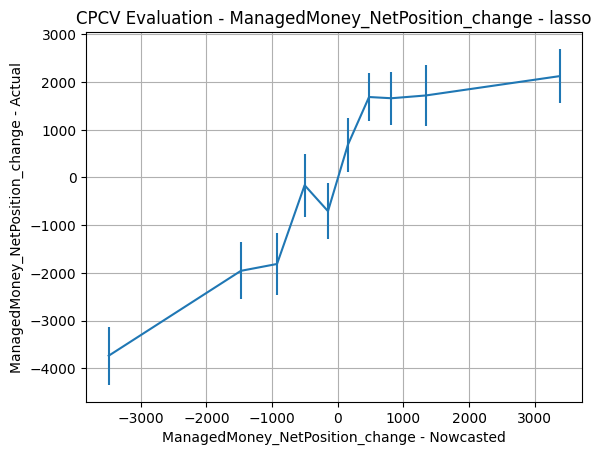

ridge: score=0.1701, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


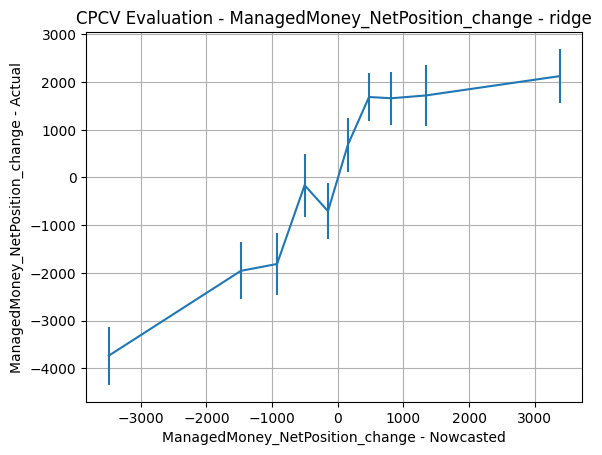

rf: score=0.3619, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}


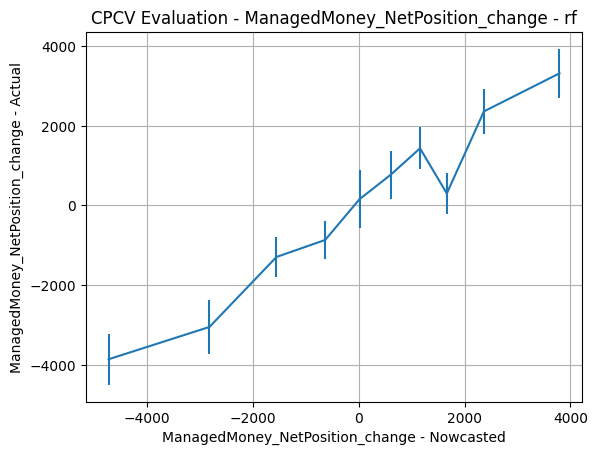

hgbm: score=0.2912, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 156}
{'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 156}


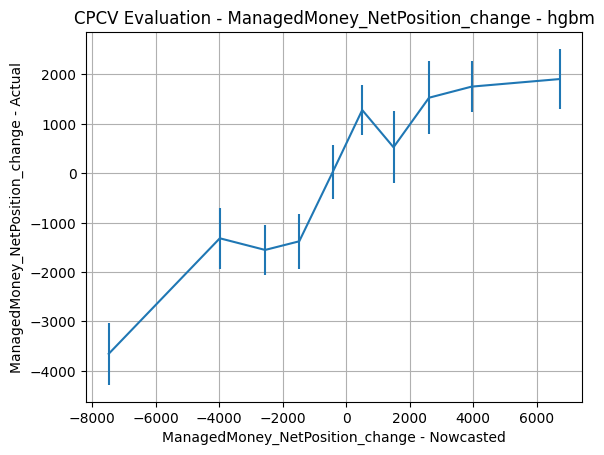

ols: score=0.1701, params={'model': 'ols'}
{}


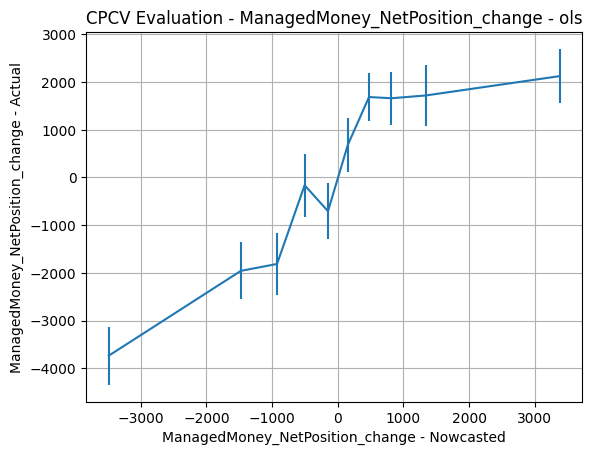

enet: score=0.0880, params={'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}
{'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}


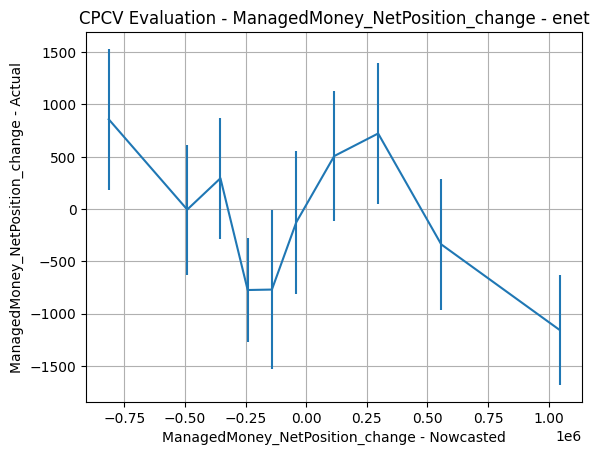

extra: score=0.3683, params={'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'log2'}
{'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'log2'}


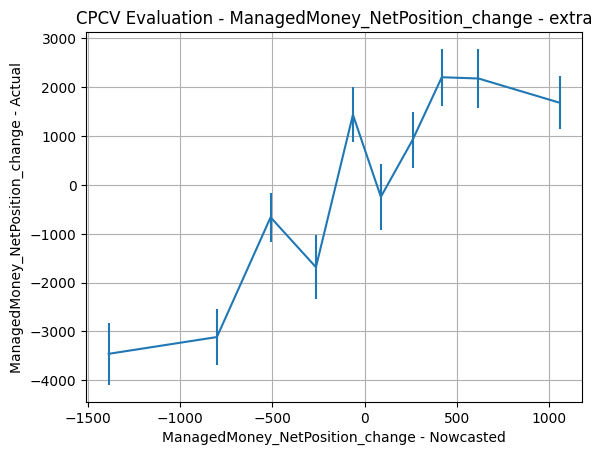

ManagedMoney_LongPosition_change
lasso: score=0.1995, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


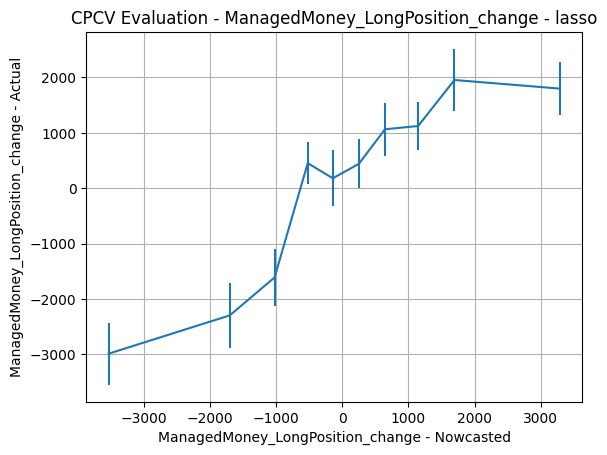

ridge: score=0.1684, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


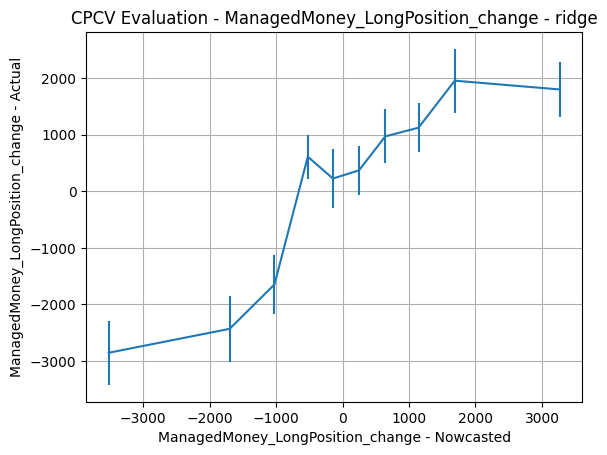

rf: score=0.3053, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'log2'}


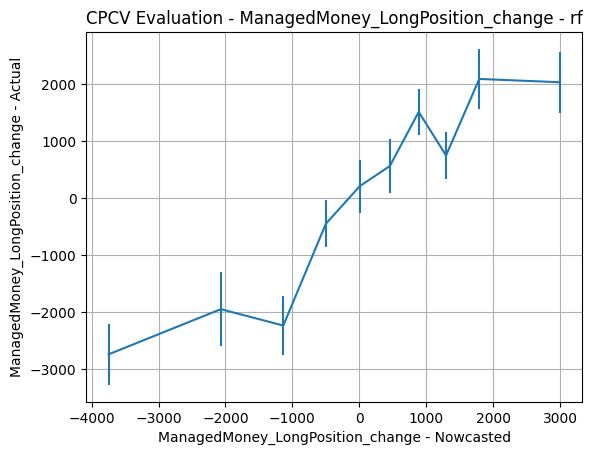

hgbm: score=0.1840, params={'model': 'hgbm', 'learning_rate': 0.2918396596927686, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.009283177793250053, 'max_leaf_nodes': 183}
{'learning_rate': 0.2918396596927686, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.009283177793250053, 'max_leaf_nodes': 183}


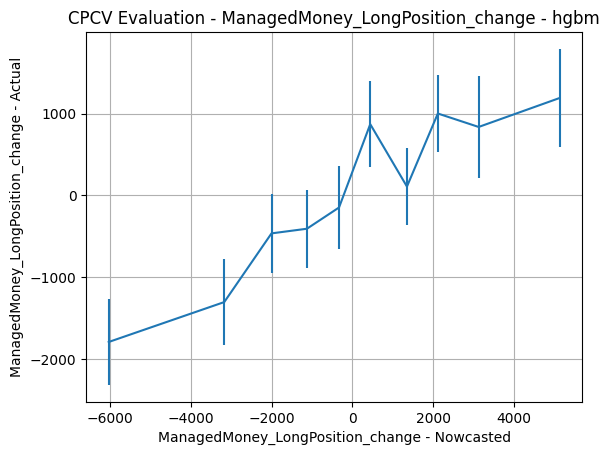

ols: score=0.2003, params={'model': 'ols'}
{}


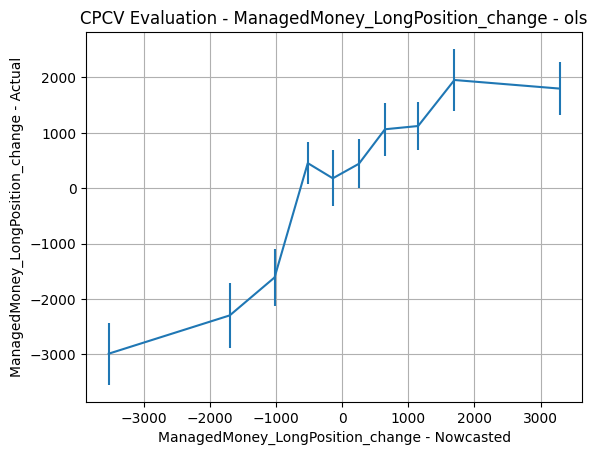

enet: score=0.0188, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


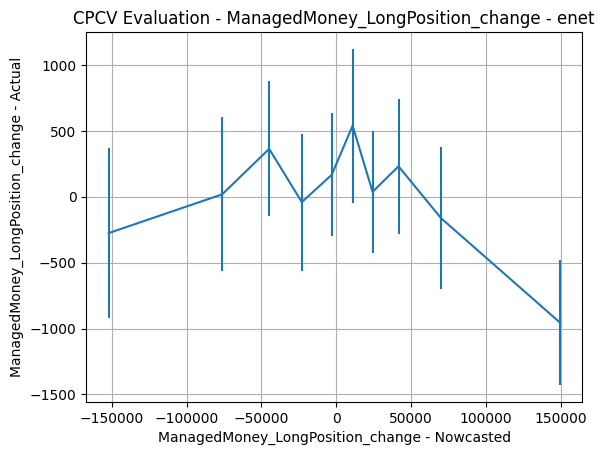

extra: score=0.2621, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}


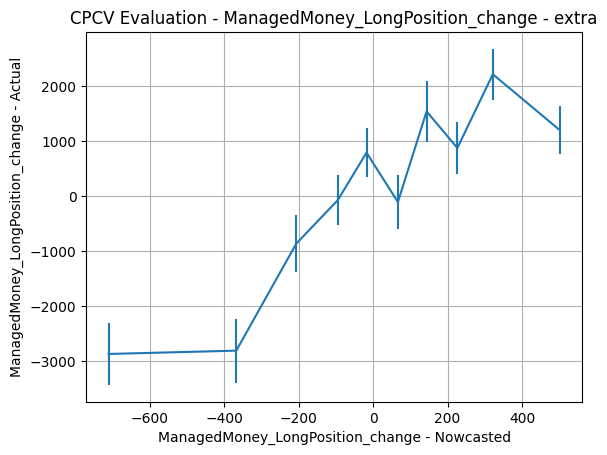

ManagedMoney_ShortPosition_change
lasso: score=0.1467, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


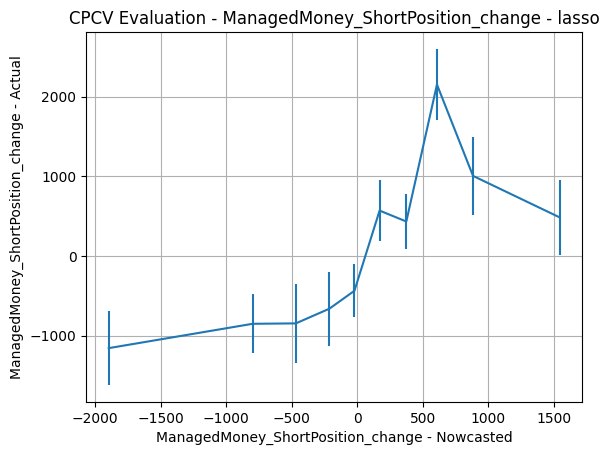

ridge: score=0.1470, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


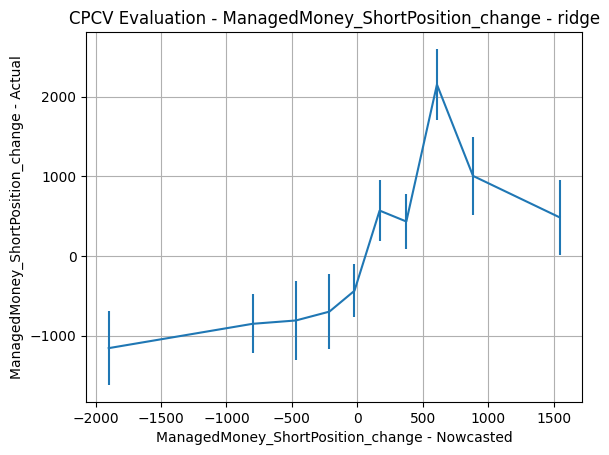

rf: score=0.1716, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}


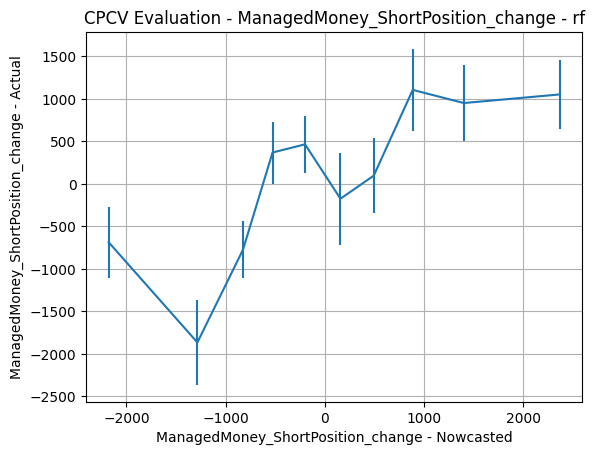

hgbm: score=0.1559, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


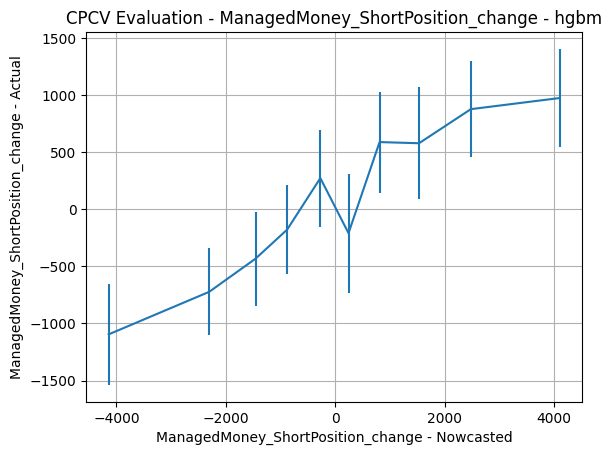

ols: score=0.1470, params={'model': 'ols'}
{}


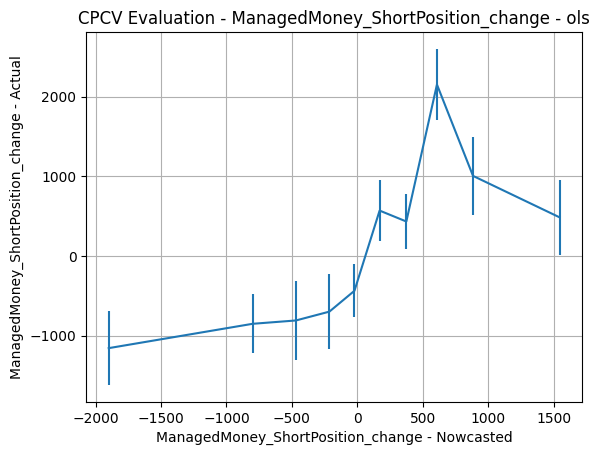

enet: score=-0.0270, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


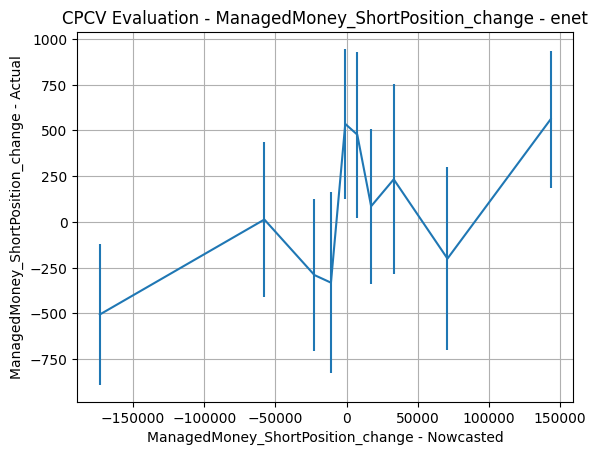

extra: score=0.1962, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


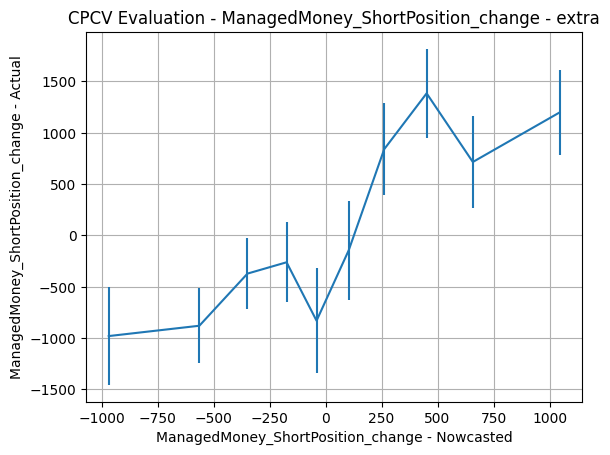

ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0583, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


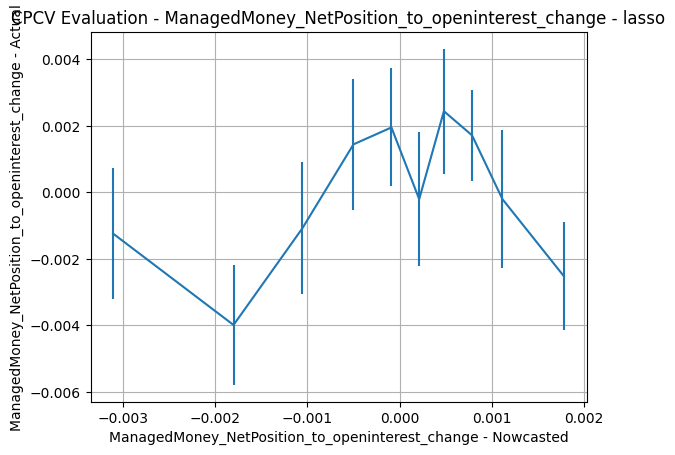

ridge: score=0.1232, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


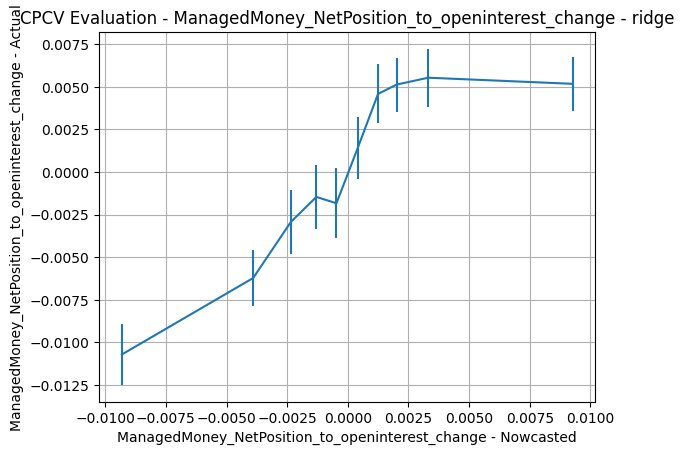

rf: score=0.3604, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}


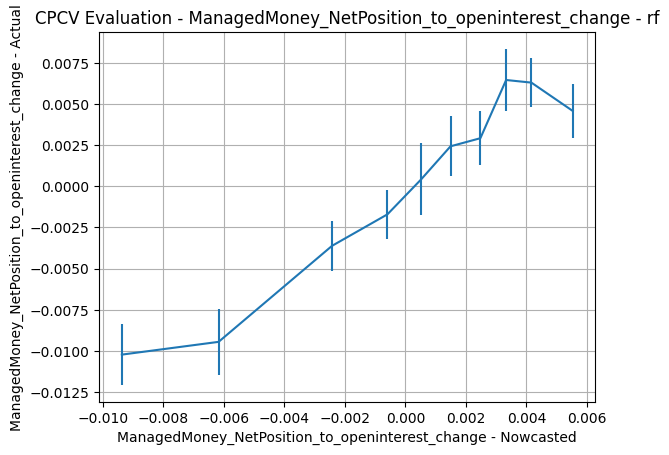

hgbm: score=0.2917, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 16, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}
{'learning_rate': 0.14191432081077868, 'max_depth': 16, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}


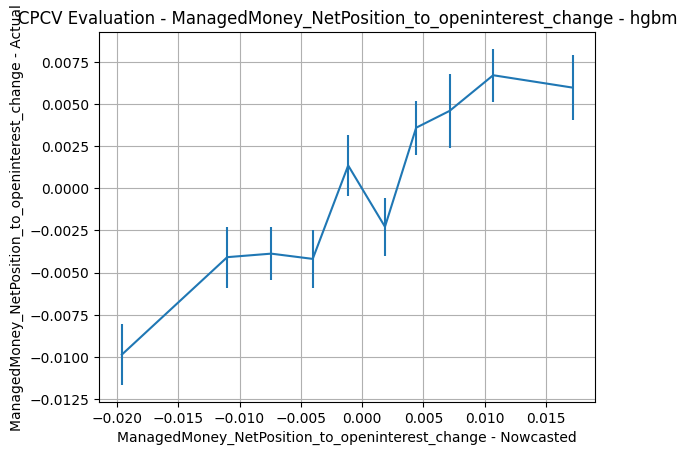

ols: score=0.1232, params={'model': 'ols'}
{}


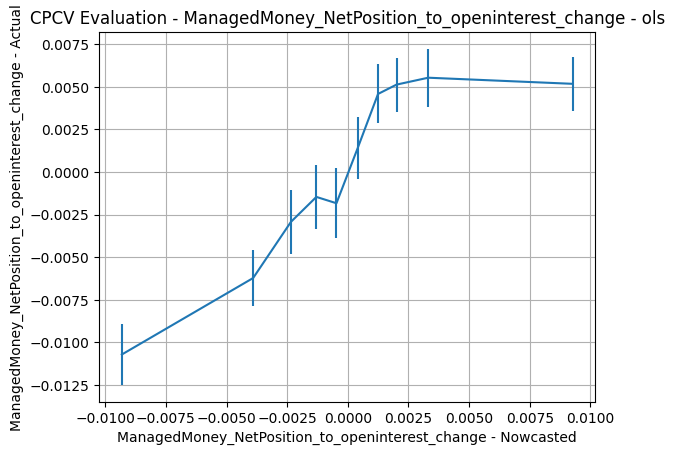

enet: score=-0.0282, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


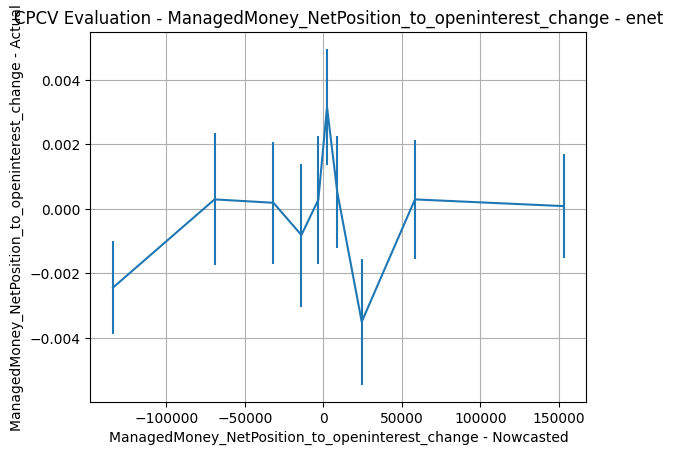

extra: score=0.3421, params={'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'log2'}


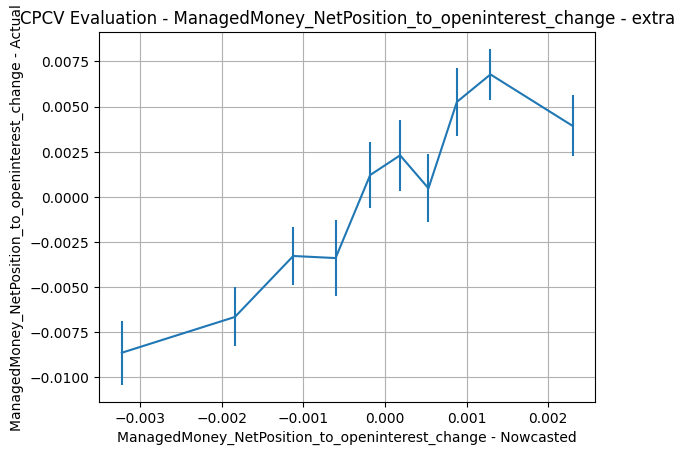

ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0544, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


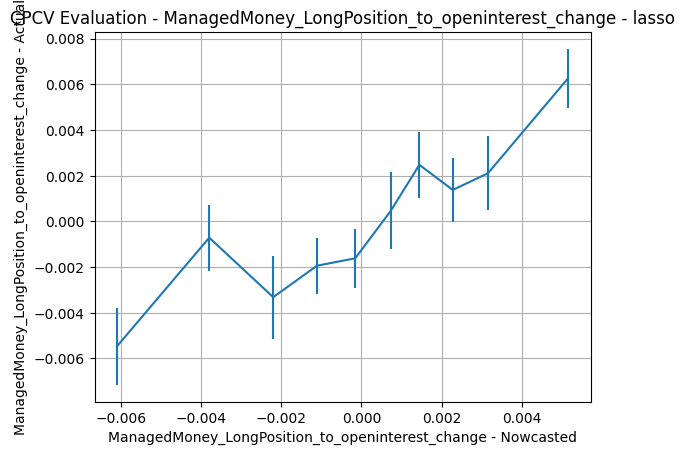

ridge: score=0.1905, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


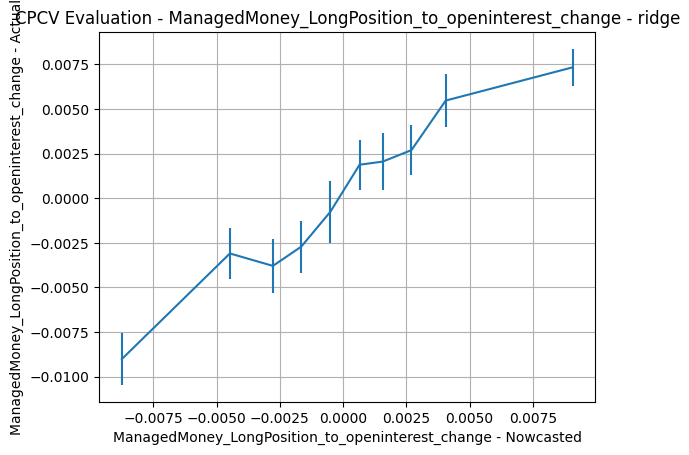

rf: score=0.2832, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}


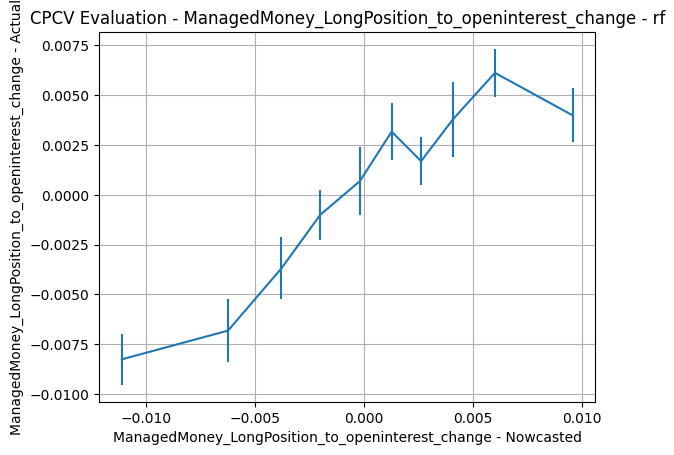

hgbm: score=0.2601, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


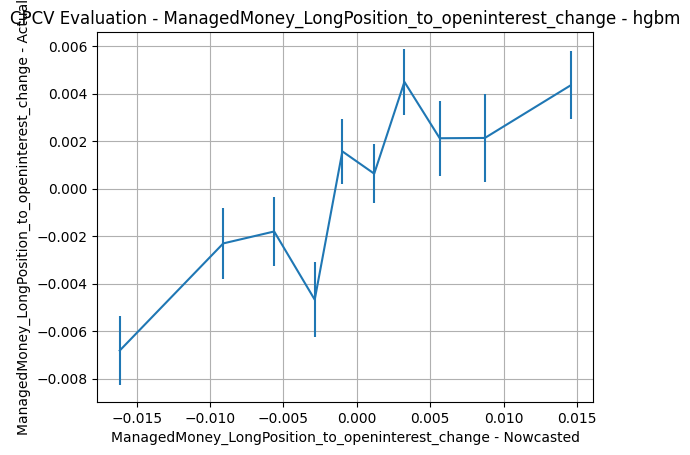

ols: score=0.2159, params={'model': 'ols'}
{}


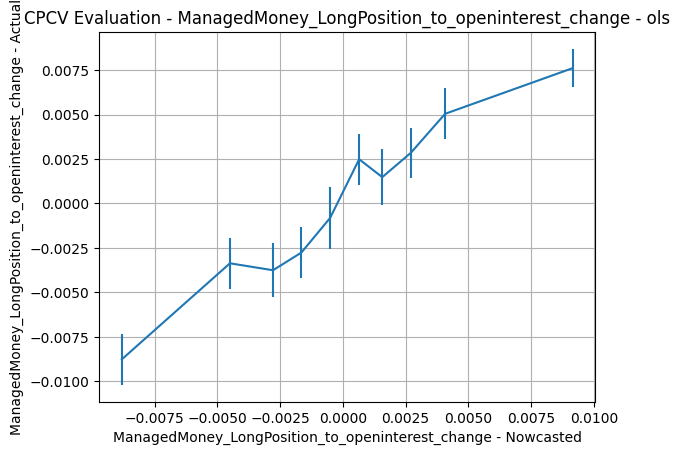

enet: score=-0.0532, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


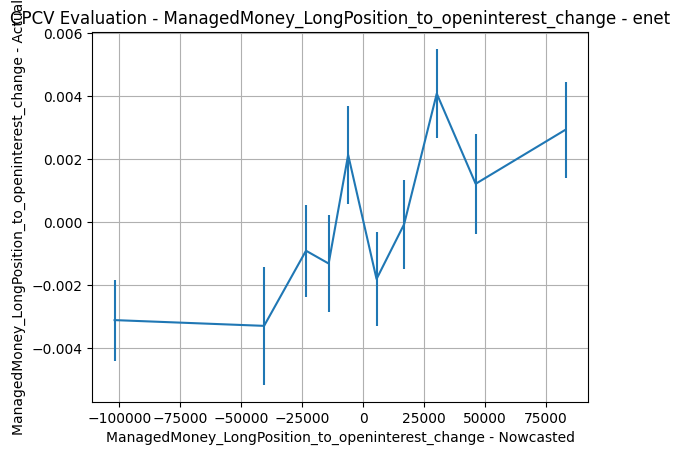

extra: score=0.2476, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}


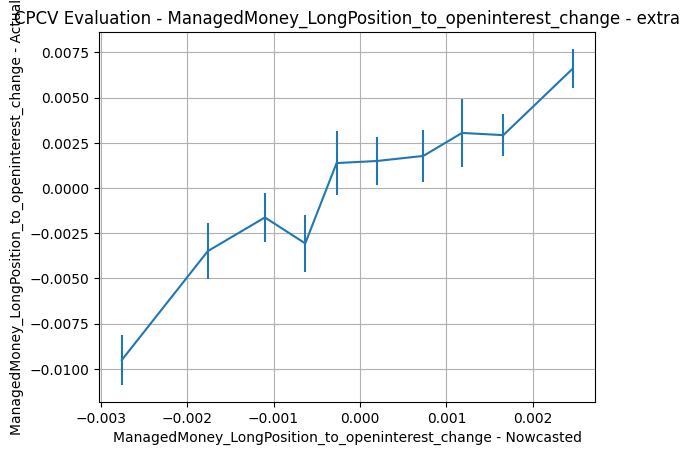

ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0425, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


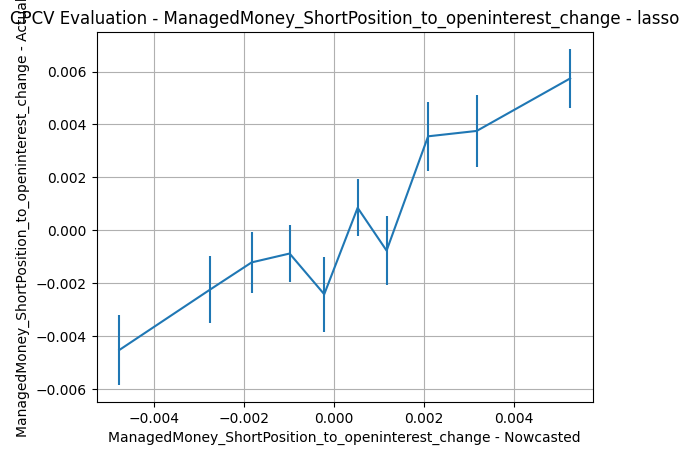

ridge: score=0.1805, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


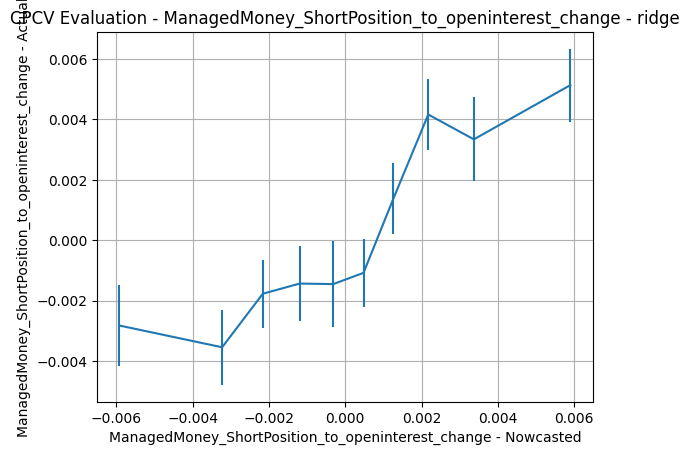

rf: score=0.2475, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}


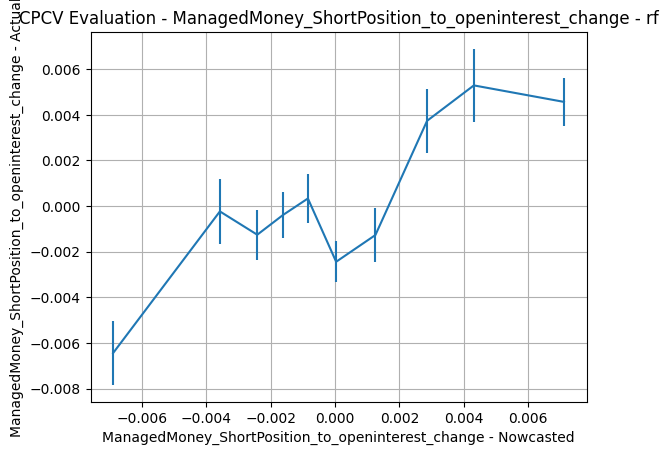

hgbm: score=0.2037, params={'model': 'hgbm', 'learning_rate': 0.04669207840693148, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.2579396418255043, 'max_leaf_nodes': 237}
{'learning_rate': 0.04669207840693148, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.2579396418255043, 'max_leaf_nodes': 237}


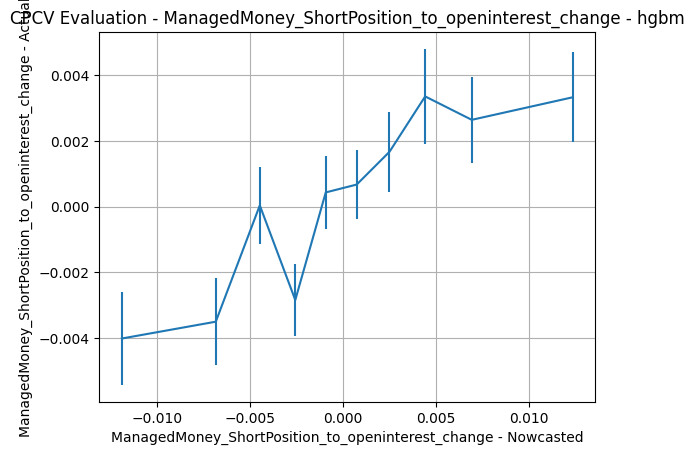

ols: score=0.1805, params={'model': 'ols'}
{}


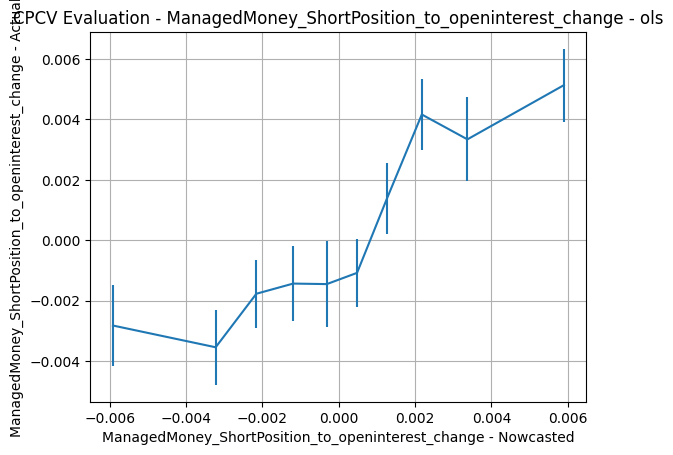

enet: score=-0.0412, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


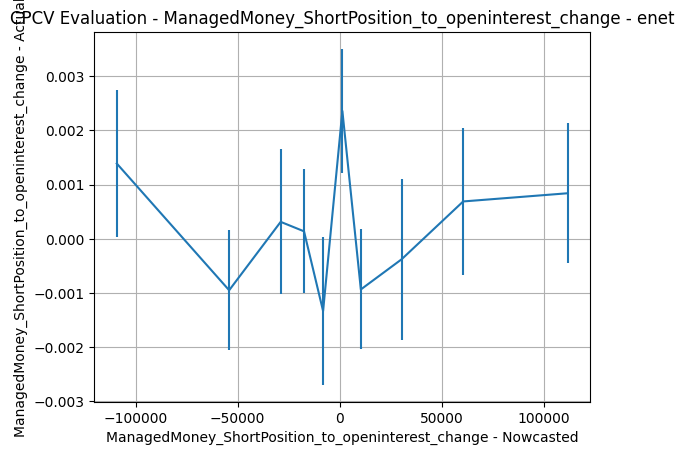

extra: score=0.2548, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


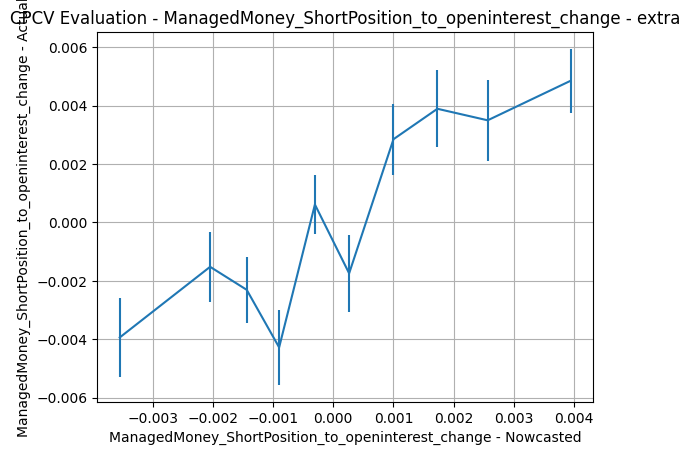

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
ManagedMoney_NetPosition_change,0.147266,0.147272,0.378214,0.298620,0.147272,-0.067792,0.311474
ManagedMoney_LongPosition_change,0.266659,0.268046,0.345163,0.202418,0.266619,-0.029871,0.318326
ManagedMoney_ShortPosition_change,0.136829,0.136772,0.189676,0.147011,0.136772,0.037036,0.177710
ManagedMoney_NetPosition_to_openinterest_change,0.006606,0.111982,0.330303,0.296649,0.111982,0.020247,0.263515
ManagedMoney_LongPosition_to_openinterest_change,0.198011,0.237385,0.313344,0.223252,0.236327,0.110739,0.305049
ManagedMoney_ShortPosition_to_openinterest_change,0.245554,0.180500,0.247871,0.203725,0.180500,-0.008834,0.254178


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_per_response

{'ManagedMoney_NetPosition_change': 'rf',
 'ManagedMoney_LongPosition_change': 'rf',
 'ManagedMoney_ShortPosition_change': 'rf',
 'ManagedMoney_NetPosition_to_openinterest_change': 'rf',
 'ManagedMoney_LongPosition_to_openinterest_change': 'rf',
 'ManagedMoney_ShortPosition_to_openinterest_change': 'extra'}

In [40]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

ManagedMoney_NetPosition_change
{'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
ManagedMoney_LongPosition_change
{'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'log2'}
ManagedMoney_ShortPosition_change
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
ManagedMoney_LongPosition_to_openinterest_change
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


In [41]:
final_selected_model_and_parameters_per_response

{'ManagedMoney_NetPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 12,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 30,
   'min_samples_leaf': 4,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 19,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 19,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1000,
   'max_depth': 24

In [42]:
import json
with open("ho_cot_mm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)